In [2]:
import pandas as pd 
import numpy as np
import glob
from tqdm import tqdm
import ast

In [216]:
df.head()

,White,Black,stats_array_
0,MNikolov,0018Anata,"[2557, 2342, 53, 0.6, 0.8, 0.6, 0.6, 0.72, 0.6..."
1,Tigranpatagonian,007joaquincel,"[2175, 2098, 75, 0.8, 0.61538464, 0.42857143, ..."
2,Turkchess1905,0817chess,"[2832, 2785, 56, 1.0, 0.8148148, 0.47619048, 0..."
3,Y0ung_Capablanca,0817chess,"[2841, 2734, 143, 0.2, 0.5063291, 0.64285713, ..."
4,LikeWater,0817chess,"[2751, 2737, 48, 0.6, 0.47619048, 0.42105263, ..."


In [217]:
df = df[~df['stats_array_'].apply(lambda x: any('-1.0' in x[i] for i in range(20, 56) if i < len(x)))]

In [188]:
sum(df['mean_prev_scores_d_w'] == '-1.0')

0

### Графики доли совпадений
Общие

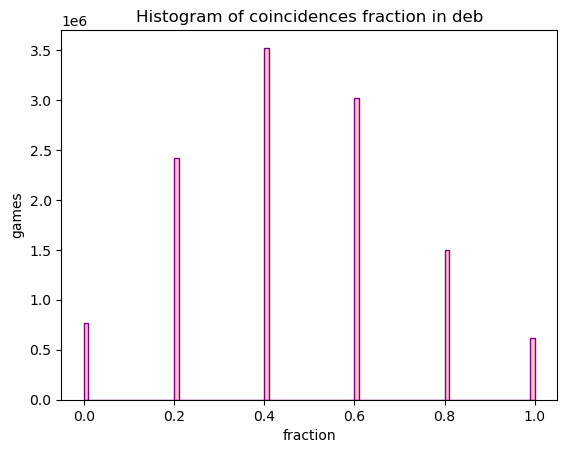

In [107]:
import matplotlib.pyplot as plt
coin_d_w = df['stats_array_'].apply(lambda x: x[3])
coin_d_b = df['stats_array_'].apply(lambda x: x[6])
y = pd.concat([coin_d_w, coin_d_b])
plt.hist(sorted(y), color='pink', bins=100, edgecolor = 'purple')
plt.title('Histogram of coincidences fraction in deb')
plt.xlabel('fraction')
plt.ylabel('games')
plt.show()

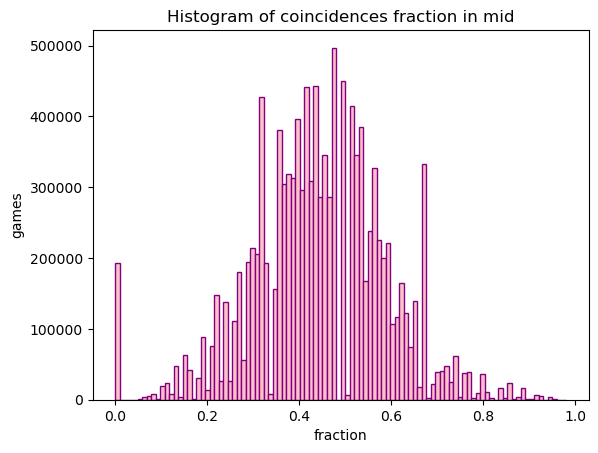

In [108]:
import matplotlib.pyplot as plt
coin_d_w = df['stats_array_'].apply(lambda x: round(float(x[4]), 2))
coin_d_b = df['stats_array_'].apply(lambda x: round(float(x[7]), 2))
y = pd.concat([coin_d_w, coin_d_b])
plt.hist(sorted(y), color='pink', bins=100, edgecolor = 'purple')
plt.title('Histogram of coincidences fraction in mid')
plt.xlabel('fraction')
plt.ylabel('games')
plt.show()

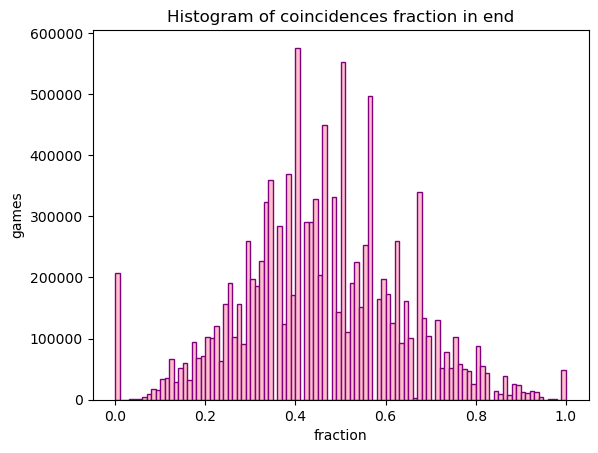

In [109]:
import matplotlib.pyplot as plt
coin_d_w = df['stats_array_'].apply(lambda x: round(float(x[5]), 2))
coin_d_b = df['stats_array_'].apply(lambda x: round(float(x[8]), 2))
y = pd.concat([coin_d_w, coin_d_b])
plt.hist(sorted(y), color='pink', bins=100, edgecolor = 'purple')
plt.title('Histogram of coincidences fraction in end')
plt.xlabel('fraction')
plt.ylabel('games')
plt.show()

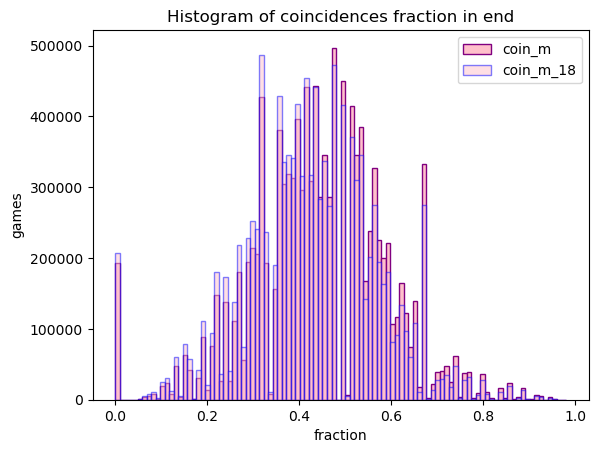

In [110]:
import matplotlib.pyplot as plt
coin_m_w = df['stats_array_'].apply(lambda x: round(float(x[4]), 2))
coin_m_b = df['stats_array_'].apply(lambda x: round(float(x[7]), 2))
coin_m_w_18 = df['stats_array_'].apply(lambda x: round(float(x[10]), 2))
coin_m_b_18 = df['stats_array_'].apply(lambda x: round(float(x[13]), 2))
y = pd.concat([coin_m_w, coin_m_b])
y2 = pd.concat([coin_m_w_18, coin_m_b_18])
plt.hist(sorted(y), color='pink', bins=100, edgecolor = 'purple', label='coin_m')
plt.hist(sorted(y2), color='pink', bins=100, edgecolor = 'blue', alpha=0.5, label='coin_m_18')
plt.title('Histogram of coincidences fraction in end')
plt.legend()
plt.xlabel('fraction')
plt.ylabel('games')
plt.show()

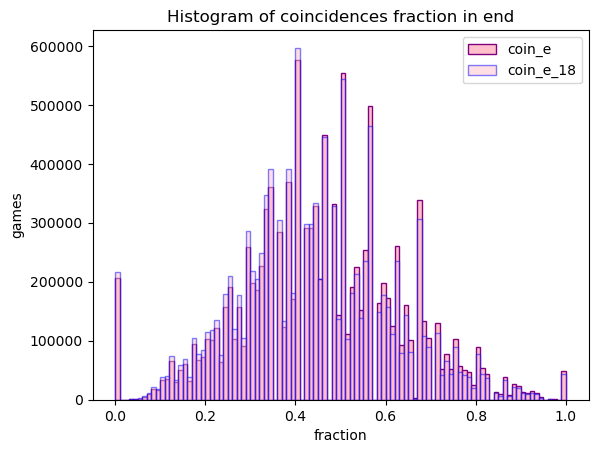

In [111]:
import matplotlib.pyplot as plt
coin_e_w = df['stats_array_'].apply(lambda x: round(float(x[5]), 2))
coin_e_b = df['stats_array_'].apply(lambda x: round(float(x[8]), 2))
coin_e_w_18 = df['stats_array_'].apply(lambda x: round(float(x[11]), 2))
coin_e_b_18 = df['stats_array_'].apply(lambda x: round(float(x[14]), 2))
y = pd.concat([coin_e_w, coin_e_b])
y2 = pd.concat([coin_e_w_18, coin_e_b_18])
plt.hist(sorted(y), color='pink', bins=100, edgecolor = 'purple', label='coin_e')
plt.hist(sorted(y2), color='pink', bins=100, edgecolor = 'blue', alpha=0.5, label='coin_e_18')
plt.title('Histogram of coincidences fraction in end')
plt.legend()
plt.xlabel('fraction')
plt.ylabel('games')
plt.show()

In [112]:
df['stats_array_'].apply(lambda x: x[17])

0          0
1          0
2          0
3          0
4          0
          ..
5926625    0
5926626    0
5926627    0
5926628    0
5926629    0
Name: stats_array_, Length: 5926630, dtype: object

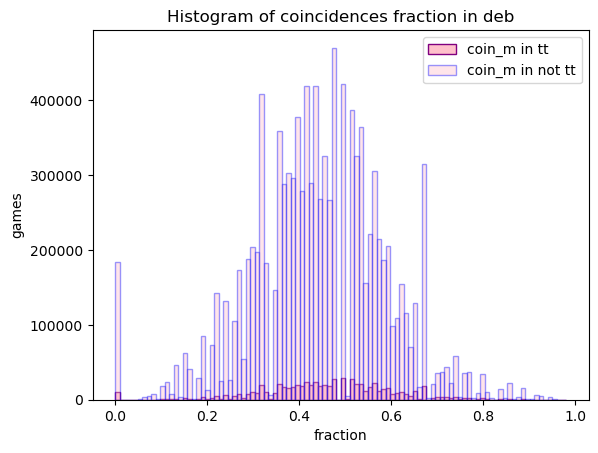

In [113]:
df['is_tt'] = df['stats_array_'].apply(lambda x: x[17])

coin_m_w_tt = df[df['is_tt'] == '1']['stats_array_'].apply(lambda x: round(float(x[4]), 2))
coin_m_b_tt = df[df['is_tt'] == '1']['stats_array_'].apply(lambda x: round(float(x[7]), 2))
coin_m_w_not_tt = df[df['is_tt'] == '0']['stats_array_'].apply(lambda x: round(float(x[4]), 2))
coin_m_b_not_tt = df[df['is_tt'] == '0']['stats_array_'].apply(lambda x: round(float(x[7]), 2))
y = pd.concat([coin_m_w_tt, coin_m_b_tt])
y2 = pd.concat([coin_m_w_not_tt, coin_m_b_not_tt])
plt.hist(sorted(y), color='pink', bins=100, edgecolor = 'purple', label='coin_m in tt')
plt.hist(sorted(y2), color='pink', bins=100, edgecolor = 'blue', alpha=0.4, label='coin_m in not tt')
plt.title('Histogram of coincidences fraction in deb')
plt.legend()
plt.xlabel('fraction')
plt.ylabel('games')
plt.show()

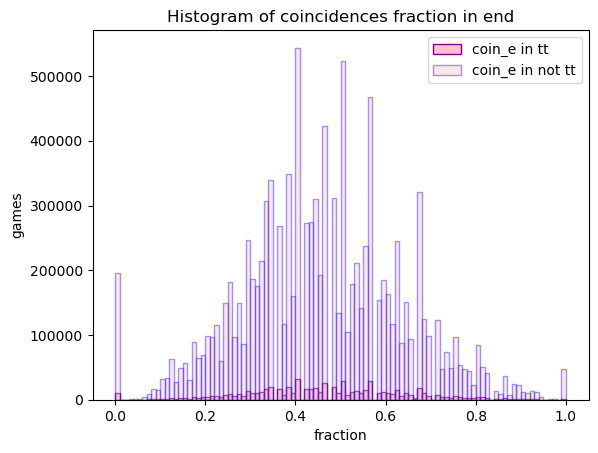

In [114]:
coin_e_w_tt = df[df['is_tt'] == '1']['stats_array_'].apply(lambda x: round(float(x[5]), 2))
coin_e_b_tt = df[df['is_tt'] == '1']['stats_array_'].apply(lambda x: round(float(x[8]), 2))
coin_e_w_not_tt = df[df['is_tt'] == '0']['stats_array_'].apply(lambda x: round(float(x[5]), 2))
coin_e_b_not_tt = df[df['is_tt'] == '0']['stats_array_'].apply(lambda x: round(float(x[8]), 2))
y = pd.concat([coin_e_w_tt, coin_e_b_tt])
y2 = pd.concat([coin_e_w_not_tt, coin_e_b_not_tt])
plt.hist(sorted(y), color='pink', bins=100, edgecolor = 'purple', label='coin_e in tt')
plt.hist(sorted(y2), color='pink', bins=100, edgecolor = 'blue', alpha=0.4, label='coin_e in not tt')
plt.title('Histogram of coincidences fraction in end')
plt.legend()
plt.xlabel('fraction')
plt.ylabel('games')
plt.show()

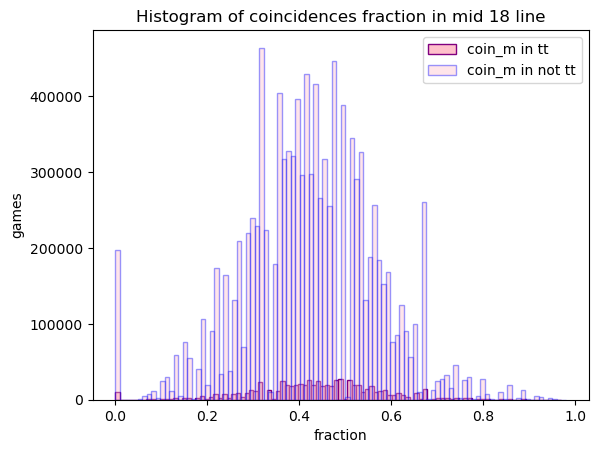

In [115]:
df['is_tt'] = df['stats_array_'].apply(lambda x: x[17])

coin_m_w_tt = df[df['is_tt'] == '1']['stats_array_'].apply(lambda x: round(float(x[10]), 2))
coin_m_b_tt = df[df['is_tt'] == '1']['stats_array_'].apply(lambda x: round(float(x[13]), 2))
coin_m_w_not_tt = df[df['is_tt'] == '0']['stats_array_'].apply(lambda x: round(float(x[10]), 2))
coin_m_b_not_tt = df[df['is_tt'] == '0']['stats_array_'].apply(lambda x: round(float(x[13]), 2))
y = pd.concat([coin_m_w_tt, coin_m_b_tt])
y2 = pd.concat([coin_m_w_not_tt, coin_m_b_not_tt])
plt.hist(sorted(y), color='pink', bins=100, edgecolor = 'purple', label='coin_m in tt')
plt.hist(sorted(y2), color='pink', bins=100, edgecolor = 'blue', alpha=0.4, label='coin_m in not tt')
plt.title('Histogram of coincidences fraction in mid 18 line')
plt.legend()
plt.xlabel('fraction')
plt.ylabel('games')
plt.show()

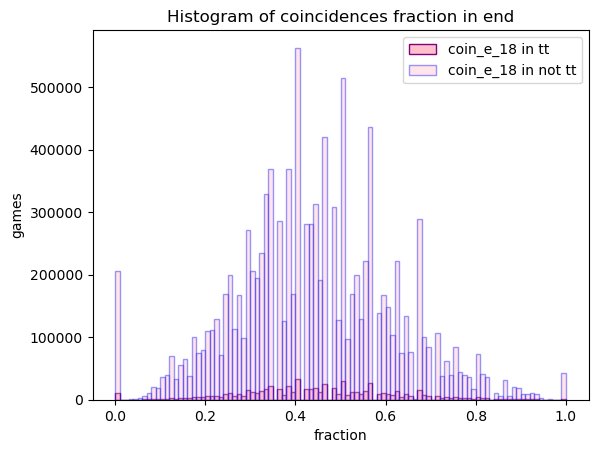

In [116]:
df['is_tt'] = df['stats_array_'].apply(lambda x: x[17])

coin_m_w_tt = df[df['is_tt'] == '1']['stats_array_'].apply(lambda x: round(float(x[11]), 2))
coin_m_b_tt = df[df['is_tt'] == '1']['stats_array_'].apply(lambda x: round(float(x[14]), 2))
coin_m_w_not_tt = df[df['is_tt'] == '0']['stats_array_'].apply(lambda x: round(float(x[11]), 2))
coin_m_b_not_tt = df[df['is_tt'] == '0']['stats_array_'].apply(lambda x: round(float(x[14]), 2))
y = pd.concat([coin_m_w_tt, coin_m_b_tt])
y2 = pd.concat([coin_m_w_not_tt, coin_m_b_not_tt])
plt.hist(sorted(y), color='pink', bins=100, edgecolor = 'purple', label='coin_e_18 in tt')
plt.hist(sorted(y2), color='pink', bins=100, edgecolor = 'blue', alpha=0.4, label='coin_e_18 in not tt')
plt.title('Histogram of coincidences fraction in end')
plt.legend()
plt.xlabel('fraction')
plt.ylabel('games')
plt.show()

In [117]:
df['Result_w'] = df['stats_array_'].apply(lambda x: float(x[15]))

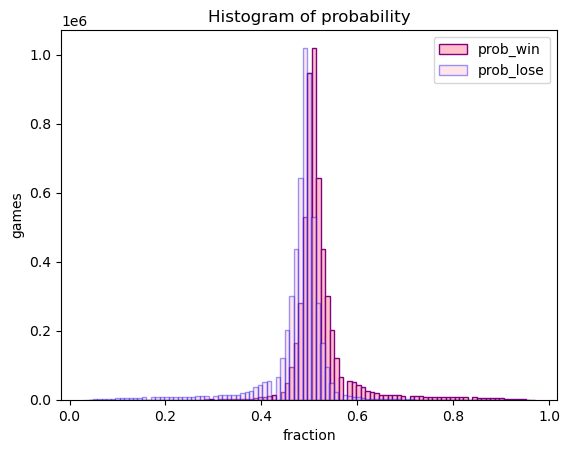

In [118]:
prob_w_w = df[df['Result_w'] == 1.0]['stats_array_'].apply(lambda x: round(float(x[19]), 2))
prob_b_w = df[df['Result_w'] == 0.0]['stats_array_'].apply(lambda x: 1 - round(float(x[19]), 2))
prob_w_l = df[df['Result_w'] == 0.0]['stats_array_'].apply(lambda x: round(float(x[19]), 2))
prob_b_l = df[df['Result_w'] == 1.0]['stats_array_'].apply(lambda x: 1 - round(float(x[19]), 2))
y = pd.concat([prob_w_w, prob_b_w])
y2 = pd.concat([prob_w_l, prob_b_l])
plt.hist(sorted(y), color='pink', bins=100, edgecolor = 'purple', label='prob_win')
plt.hist(sorted(y2), color='pink', bins=100, edgecolor = 'blue', alpha=0.4, label='prob_lose')
plt.title('Histogram of probability')
plt.legend()
plt.xlabel('fraction')
plt.ylabel('games')
plt.show()

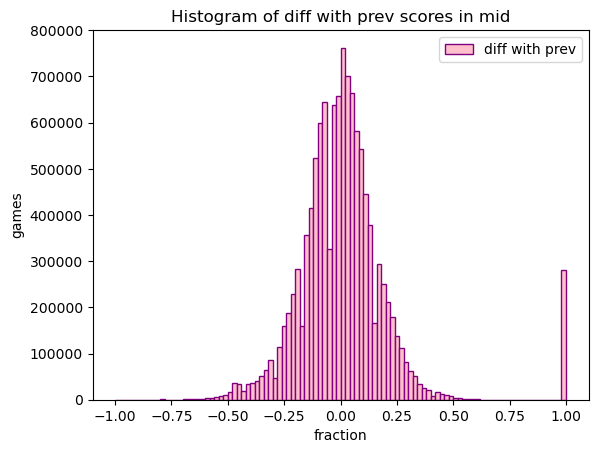

In [119]:
diff_m_w = df['stats_array_'].apply(lambda x: min(round(float(x[4]), 2) - round(float(x[21]), 2), 1))
diff_m_b = df['stats_array_'].apply(lambda x: min(round(float(x[7]), 2) - round(float(x[26]), 2), 1))

y = pd.concat([diff_m_w, diff_m_b])

plt.hist(sorted(y), color='pink', bins=100, edgecolor = 'purple', label='diff with prev')

plt.title('Histogram of diff with prev scores in mid')
plt.legend()
plt.xlabel('fraction')
plt.ylabel('games')
plt.show()

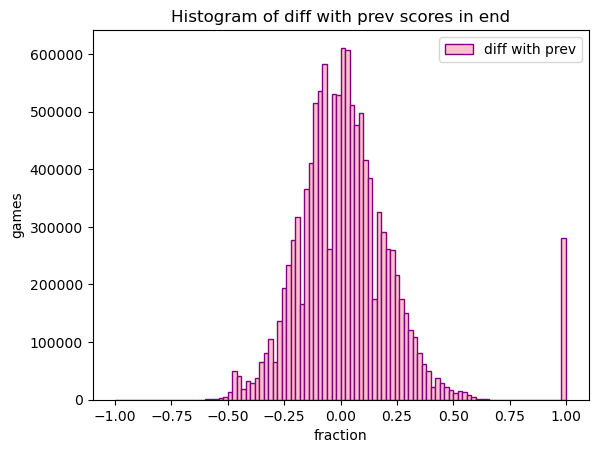

In [120]:
diff_e_w = df['stats_array_'].apply(lambda x: min(round(float(x[5]), 2) - round(float(x[22]), 2), 1))
diff_e_b = df['stats_array_'].apply(lambda x: min(round(float(x[8]), 2) - round(float(x[27]), 2), 1))

y = pd.concat([diff_e_w, diff_e_b])

plt.hist(sorted(y), color='pink', bins=100, edgecolor = 'purple', label='diff with prev')

plt.title('Histogram of diff with prev scores in end')
plt.legend()
plt.xlabel('fraction')
plt.ylabel('games')
plt.show()

In [121]:
player_df = pd.DataFrame({'username' : df['White'], 'elo' : df['stats_array_'].apply(lambda x: int(x[0])), 'frac' : df['stats_array_'].apply(lambda x: float(x[4]))})

In [122]:
player_df_b = pd.DataFrame({'username' : df['Black'], 'elo' : df['stats_array_'].apply(lambda x: int(x[1])), 'frac' : df['stats_array_'].apply(lambda x: float(x[7]))})

In [123]:
player_df = pd.concat([player_df, player_df_b])

In [124]:
player_df.head()

,username,elo,frac
0,MNikolov,2557,0.800000
1,Tigranpatagonian,2175,0.615385
2,Turkchess1905,2832,0.814815
3,Y0ung_Capablanca,2841,0.506329
4,LikeWater,2751,0.476190


In [125]:
import scipy.stats as stats

In [126]:
bin_size = 50
bins = np.arange(player_df['elo'].min(), player_df['elo'].max() + bin_size, bin_size)

mean_coinc = []
lower_bounds = []
upper_bounds = []

for i in range(len(bins) - 1):
    bin_data = player_df[(player_df['elo'] >= bins[i]) & (player_df['elo'] < bins[i + 1])]
    if len(bin_data) > 0:
        frac = bin_data['frac'].to_numpy()
        mean = frac.mean()
        std_err = stats.sem(frac)
        ci = stats.t.interval(0.95, len(bin_data) - 1, loc=mean, scale=std_err)

        mean_coinc.append(mean)
        lower_bounds.append(ci[0])
        upper_bounds.append(ci[1])
    else:
        mean_coinc.append(np.nan)
        lower_bounds.append(np.nan)
        upper_bounds.append(np.nan)

bin_centers = bins[:-1] + bin_size / 2

/opt/app-root/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/app-root/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


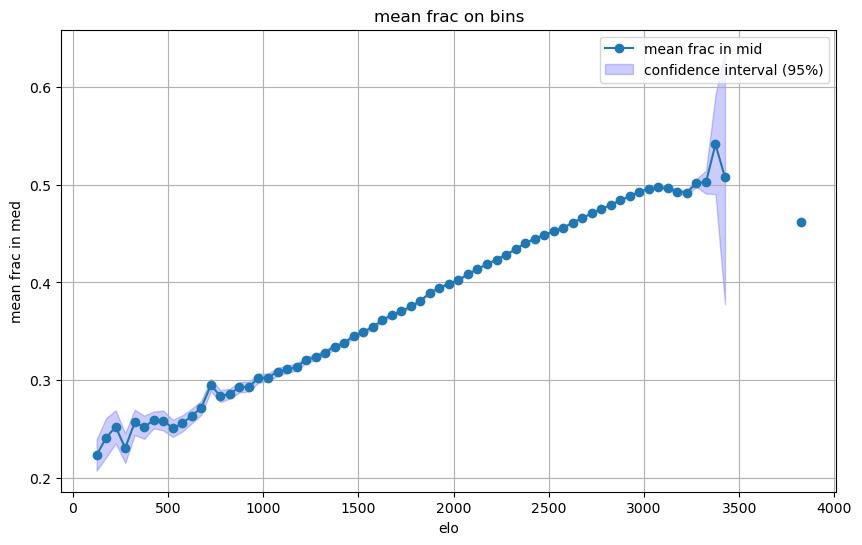

In [127]:
plt.figure(figsize=(10,6))
plt.plot(bin_centers, mean_coinc, marker='o', label='mean frac in mid')
plt.fill_between(bin_centers, lower_bounds, upper_bounds, color='b', alpha = 0.2, label = 'confidence interval (95%)')
plt.title('mean frac on bins')
plt.xlabel('elo')
plt.ylabel('mean frac in med')
plt.legend()
plt.grid()
plt.show()

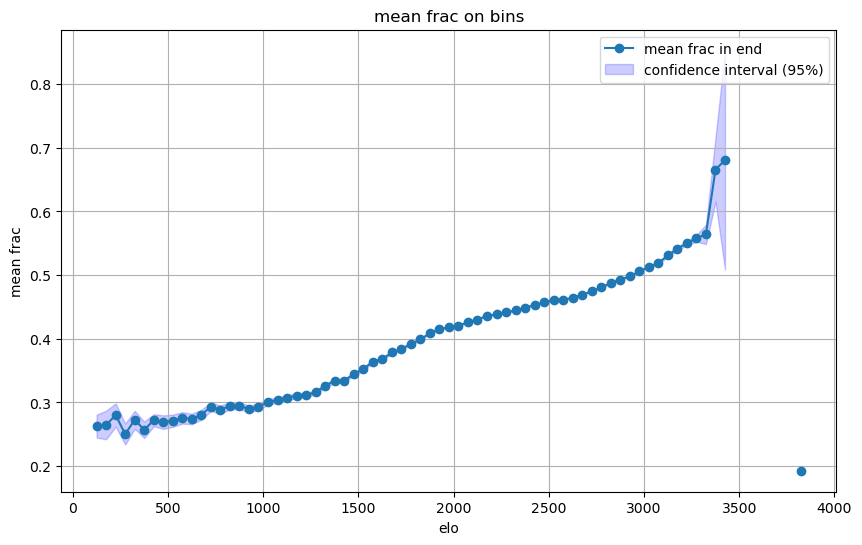

In [128]:
player_df = pd.DataFrame({'username' : df['White'], 'elo' : df['stats_array_'].apply(lambda x: int(x[0])), 'frac' : df['stats_array_'].apply(lambda x: float(x[5]))})
player_df_b = pd.DataFrame({'username' : df['Black'], 'elo' : df['stats_array_'].apply(lambda x: int(x[1])), 'frac' : df['stats_array_'].apply(lambda x: float(x[8]))})
player_df = pd.concat([player_df, player_df_b])

bin_size = 50
bins = np.arange(player_df['elo'].min(), player_df['elo'].max() + bin_size, bin_size)

mean_coinc = []
lower_bounds = []
upper_bounds = []

for i in range(len(bins) - 1):
    bin_data = player_df[(player_df['elo'] >= bins[i]) & (player_df['elo'] < bins[i + 1])]
    if len(bin_data) > 0:
        frac = bin_data['frac'].to_numpy()
        mean = frac.mean()
        std_err = stats.sem(frac)
        ci = stats.t.interval(0.95, len(bin_data) - 1, loc=mean, scale=std_err)

        mean_coinc.append(mean)
        lower_bounds.append(ci[0])
        upper_bounds.append(ci[1])
    else:
        mean_coinc.append(np.nan)
        lower_bounds.append(np.nan)
        upper_bounds.append(np.nan)

bin_centers = bins[:-1] + bin_size / 2

plt.figure(figsize=(10,6))
plt.plot(bin_centers, mean_coinc, marker='o', label='mean frac in end')
plt.fill_between(bin_centers, lower_bounds, upper_bounds, color='b', alpha = 0.2, label = 'confidence interval (95%)')
plt.title('mean frac on bins')
plt.xlabel('elo')
plt.ylabel('mean frac')
plt.legend()
plt.grid()
plt.show()

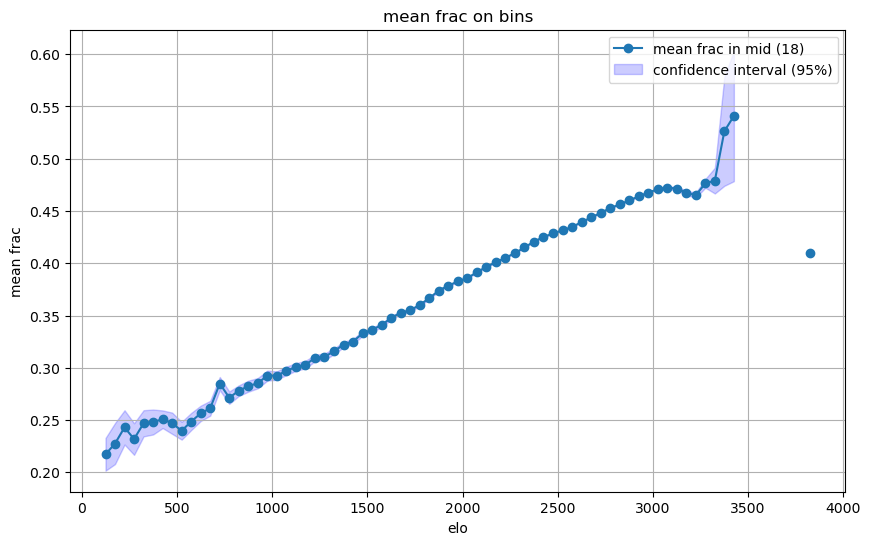

In [129]:
player_df = pd.DataFrame({'username' : df['White'], 'elo' : df['stats_array_'].apply(lambda x: int(x[0])), 'frac' : df['stats_array_'].apply(lambda x: float(x[10]))})
player_df_b = pd.DataFrame({'username' : df['Black'], 'elo' : df['stats_array_'].apply(lambda x: int(x[1])), 'frac' : df['stats_array_'].apply(lambda x: float(x[13]))})
player_df = pd.concat([player_df, player_df_b])

bin_size = 50
bins = np.arange(player_df['elo'].min(), player_df['elo'].max() + bin_size, bin_size)

mean_coinc = []
lower_bounds = []
upper_bounds = []

for i in range(len(bins) - 1):
    bin_data = player_df[(player_df['elo'] >= bins[i]) & (player_df['elo'] < bins[i + 1])]
    if len(bin_data) > 0:
        frac = bin_data['frac'].to_numpy()
        mean = frac.mean()
        std_err = stats.sem(frac)
        ci = stats.t.interval(0.95, len(bin_data) - 1, loc=mean, scale=std_err)

        mean_coinc.append(mean)
        lower_bounds.append(ci[0])
        upper_bounds.append(ci[1])
    else:
        mean_coinc.append(np.nan)
        lower_bounds.append(np.nan)
        upper_bounds.append(np.nan)

bin_centers = bins[:-1] + bin_size / 2

plt.figure(figsize=(10,6))
plt.plot(bin_centers, mean_coinc, marker='o', label='mean frac in mid (18)')
plt.fill_between(bin_centers, lower_bounds, upper_bounds, color='b', alpha = 0.2, label = 'confidence interval (95%)')
plt.title('mean frac on bins')
plt.xlabel('elo')
plt.ylabel('mean frac')
plt.legend()
plt.grid()
plt.show()

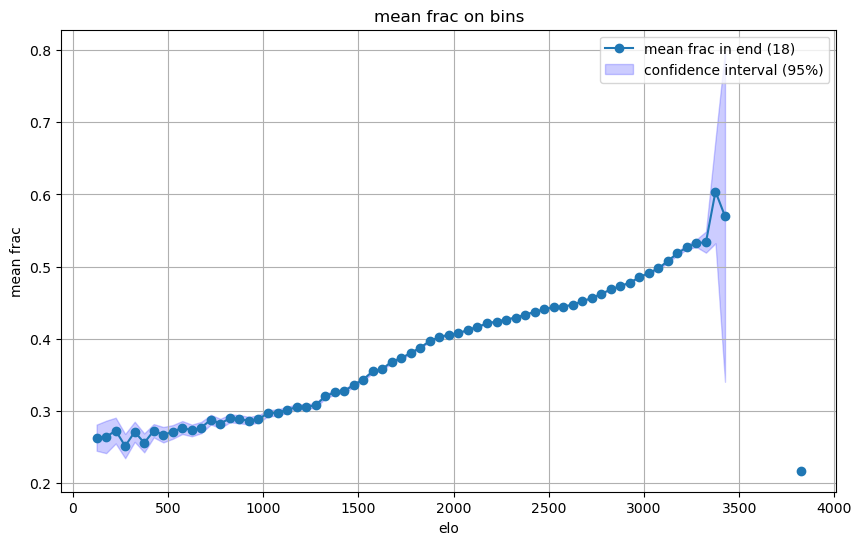

In [130]:
player_df = pd.DataFrame({'username' : df['White'], 'elo' : df['stats_array_'].apply(lambda x: int(x[0])), 'frac' : df['stats_array_'].apply(lambda x: float(x[11]))})
player_df_b = pd.DataFrame({'username' : df['Black'], 'elo' : df['stats_array_'].apply(lambda x: int(x[1])), 'frac' : df['stats_array_'].apply(lambda x: float(x[14]))})
player_df = pd.concat([player_df, player_df_b])

bin_size = 50
bins = np.arange(player_df['elo'].min(), player_df['elo'].max() + bin_size, bin_size)

mean_coinc = []
lower_bounds = []
upper_bounds = []

for i in range(len(bins) - 1):
    bin_data = player_df[(player_df['elo'] >= bins[i]) & (player_df['elo'] < bins[i + 1])]
    if len(bin_data) > 0:
        frac = bin_data['frac'].to_numpy()
        mean = frac.mean()
        std_err = stats.sem(frac)
        ci = stats.t.interval(0.95, len(bin_data) - 1, loc=mean, scale=std_err)

        mean_coinc.append(mean)
        lower_bounds.append(ci[0])
        upper_bounds.append(ci[1])
    else:
        mean_coinc.append(np.nan)
        lower_bounds.append(np.nan)
        upper_bounds.append(np.nan)

bin_centers = bins[:-1] + bin_size / 2

plt.figure(figsize=(10,6))
plt.plot(bin_centers, mean_coinc, marker='o', label='mean frac in end (18)')
plt.fill_between(bin_centers, lower_bounds, upper_bounds, color='b', alpha = 0.2, label = 'confidence interval (95%)')
plt.title('mean frac on bins')
plt.xlabel('elo')
plt.ylabel('mean frac')
plt.legend()
plt.grid()
plt.show()

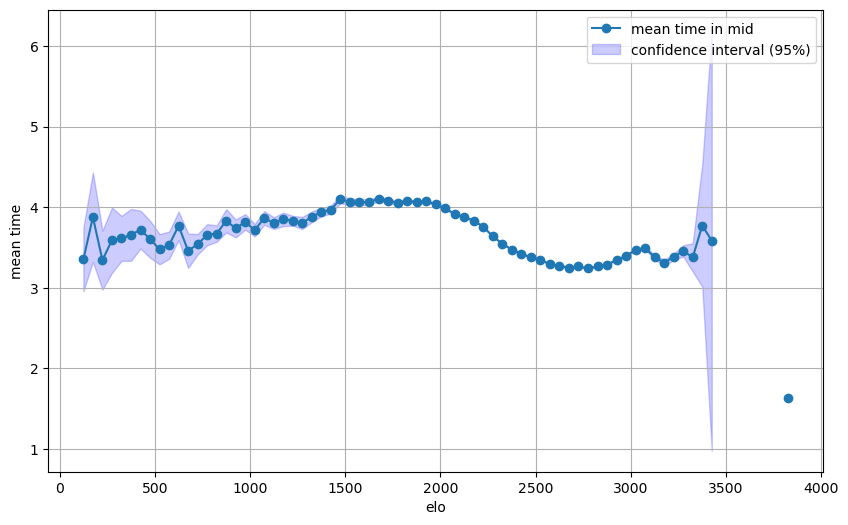

In [131]:
player_df = pd.DataFrame({'username' : df['White'], 'elo' : df['stats_array_'].apply(lambda x: int(x[0])), 'frac' : df['stats_array_'].apply(lambda x: round(float(x[40]), 2))})
player_df_b = pd.DataFrame({'username' : df['Black'], 'elo' : df['stats_array_'].apply(lambda x: int(x[1])), 'frac' : df['stats_array_'].apply(lambda x: round(float(x[34]), 2))})
player_df = pd.concat([player_df, player_df_b])

bin_size = 50
bins = np.arange(player_df['elo'].min(), player_df['elo'].max() + bin_size, bin_size)

mean_coinc = []
lower_bounds = []
upper_bounds = []

for i in range(len(bins) - 1):
    bin_data = player_df[(player_df['elo'] >= bins[i]) & (player_df['elo'] < bins[i + 1])]
    if len(bin_data) > 0:
        frac = bin_data['frac'].to_numpy()
        mean = frac.mean()
        std_err = stats.sem(frac)
        ci = stats.t.interval(0.95, len(bin_data) - 1, loc=mean, scale=std_err)

        mean_coinc.append(mean)
        lower_bounds.append(ci[0])
        upper_bounds.append(ci[1])
    else:
        mean_coinc.append(np.nan)
        lower_bounds.append(np.nan)
        upper_bounds.append(np.nan)

bin_centers = bins[:-1] + bin_size / 2

plt.figure(figsize=(10,6))
plt.plot(bin_centers, mean_coinc, marker='o', label='mean time in mid')
plt.fill_between(bin_centers, lower_bounds, upper_bounds, color='b', alpha = 0.2, label = 'confidence interval (95%)')
plt.xlabel('elo')
plt.ylabel('mean time')
plt.legend()
plt.grid()
plt.show()

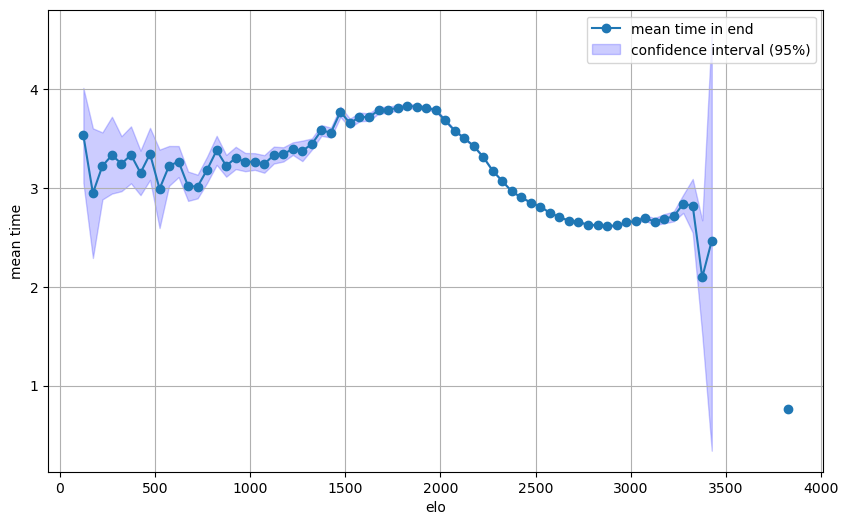

In [132]:
player_df = pd.DataFrame({'username' : df['White'], 'elo' : df['stats_array_'].apply(lambda x: int(x[0])), 'frac' : df['stats_array_'].apply(lambda x: round(float(x[42]), 2))})
player_df_b = pd.DataFrame({'username' : df['Black'], 'elo' : df['stats_array_'].apply(lambda x: int(x[1])), 'frac' : df['stats_array_'].apply(lambda x: round(float(x[36]), 2))})
player_df = pd.concat([player_df, player_df_b])

bin_size = 50
bins = np.arange(player_df['elo'].min(), player_df['elo'].max() + bin_size, bin_size)

mean_coinc = []
lower_bounds = []
upper_bounds = []

for i in range(len(bins) - 1):
    bin_data = player_df[(player_df['elo'] >= bins[i]) & (player_df['elo'] < bins[i + 1])]
    if len(bin_data) > 0:
        frac = bin_data['frac'].to_numpy()
        mean = frac.mean()
        std_err = stats.sem(frac)
        ci = stats.t.interval(0.95, len(bin_data) - 1, loc=mean, scale=std_err)

        mean_coinc.append(mean)
        lower_bounds.append(ci[0])
        upper_bounds.append(ci[1])
    else:
        mean_coinc.append(np.nan)
        lower_bounds.append(np.nan)
        upper_bounds.append(np.nan)

bin_centers = bins[:-1] + bin_size / 2

plt.figure(figsize=(10,6))
plt.plot(bin_centers, mean_coinc, marker='o', label='mean time in end')
plt.fill_between(bin_centers, lower_bounds, upper_bounds, color='b', alpha = 0.2, label = 'confidence interval (95%)')
plt.xlabel('elo')
plt.ylabel('mean time')
plt.legend()
plt.grid()
plt.show()

In [22]:
coin_deb_b = df['stats_array_'].apply(lambda x: round(float(x[38]), 2) - round(float(x[44]), 2))
coin_deb_w = df['stats_array_'].apply(lambda x: round(float(x[32]), 2) - round(float(x[50]), 2))
coin_mid_b = df['stats_array_'].apply(lambda x: round(float(x[40]), 2) - round(float(x[46]), 2))
coin_mid_w = df['stats_array_'].apply(lambda x: round(float(x[34]), 2) - round(float(x[52]), 2))
coin_end_b = df['stats_array_'].apply(lambda x: round(float(x[42]), 2) - round(float(x[48]), 2))
coin_end_w = df['stats_array_'].apply(lambda x: round(float(x[36]), 2) - round(float(x[54]), 2))

y = pd.concat([coin_deb_b, coin_deb_w])
y2 = pd.concat([coin_mid_b, coin_mid_w])
y3 = pd.concat([coin_end_b, coin_end_w])

# plt.hist(sorted(y), color='pink', bins=100, edgecolor = 'pink', label='diff with prev in deb')
# res = []
# for i in y2:
#     if i < 10 and i > -10:
# #         res.append(i)
# plt.hist(res, color='blue', bins=100, edgecolor = 'blue', label='diff with prev in mid', alpha=0.6)
# # plt.hist(sorted(y3), color='red', bins=100, edgecolor = 'red', label='diff with prev in end', alpha=0.3)

# plt.title('Histogram of diff with prev times')
# plt.legend()
# plt.xlabel('time')
# plt.ylabel('games')
# plt.show()

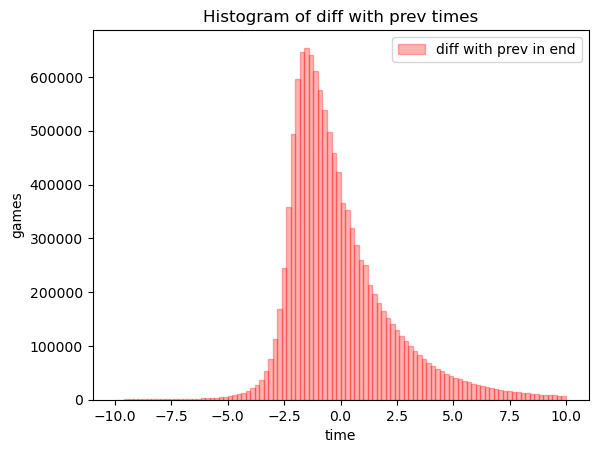

In [23]:
res = []
for i in y3:
    if i < 10 and i > -10:
        res.append(i)
plt.hist(res, color='red', bins=100, edgecolor = 'red', label='diff with prev in end', alpha=0.3)
plt.title('Histogram of diff with prev times')
plt.legend()
plt.xlabel('time')
plt.ylabel('games')
plt.show()

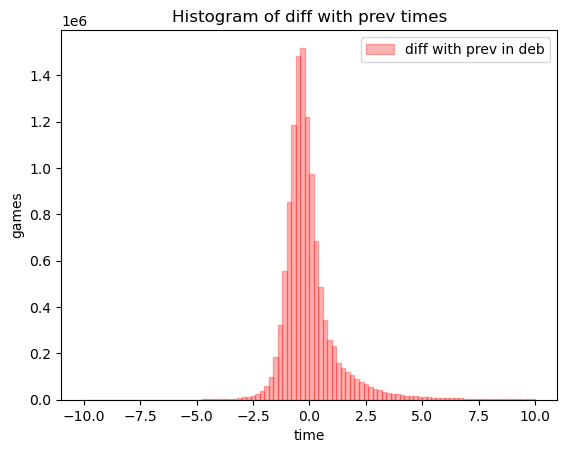

In [24]:
res = []
for i in y:
    if i < 10 and i > -10:
        res.append(i)
plt.hist(res, color='red', bins=100, edgecolor = 'red', label='diff with prev in deb', alpha=0.3)
plt.title('Histogram of diff with prev times')
plt.legend()
plt.xlabel('time')
plt.ylabel('games')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


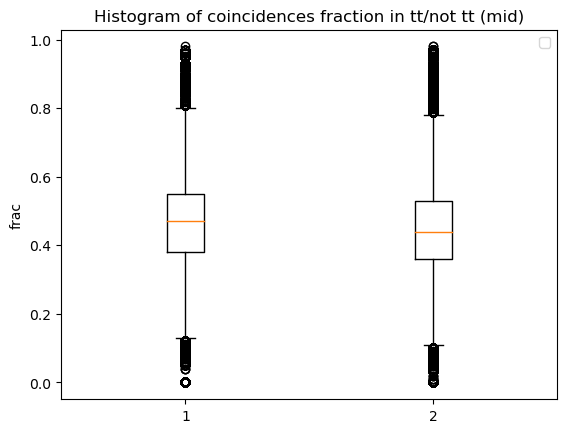

In [25]:
df['is_tt'] = df['stats_array_'].apply(lambda x: x[17])

coin_m_w_tt = df[df['is_tt'] == '1']['stats_array_'].apply(lambda x: round(float(x[4]), 2))
coin_m_b_tt = df[df['is_tt'] == '1']['stats_array_'].apply(lambda x: round(float(x[7]), 2))
coin_m_w_not_tt = df[df['is_tt'] == '0']['stats_array_'].apply(lambda x: round(float(x[4]), 2))
coin_m_b_not_tt = df[df['is_tt'] == '0']['stats_array_'].apply(lambda x: round(float(x[7]), 2))
y = pd.concat([coin_m_w_tt, coin_m_b_tt])
y2 = pd.concat([coin_m_w_not_tt, coin_m_b_not_tt])
plt.boxplot([y, y2])
plt.title('Histogram of coincidences fraction in tt/not tt (mid)')
plt.legend()
plt.ylabel('frac')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


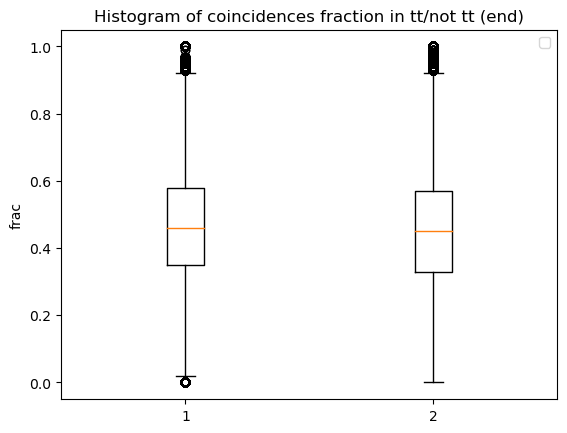

In [26]:

coin_m_w_tt = df[df['is_tt'] == '1']['stats_array_'].apply(lambda x: round(float(x[5]), 2))
coin_m_b_tt = df[df['is_tt'] == '1']['stats_array_'].apply(lambda x: round(float(x[8]), 2))
coin_m_w_not_tt = df[df['is_tt'] == '0']['stats_array_'].apply(lambda x: round(float(x[5]), 2))
coin_m_b_not_tt = df[df['is_tt'] == '0']['stats_array_'].apply(lambda x: round(float(x[8]), 2))
y = pd.concat([coin_m_w_tt, coin_m_b_tt])
y2 = pd.concat([coin_m_w_not_tt, coin_m_b_not_tt])
plt.boxplot([y, y2])
plt.title('Histogram of coincidences fraction in tt/not tt (end)')
plt.legend()
plt.ylabel('frac')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


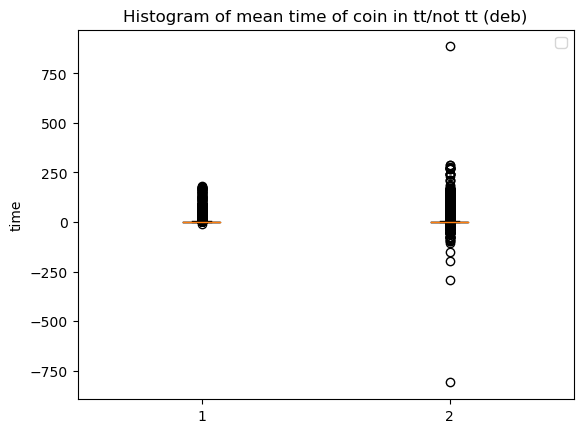

In [27]:
coin_m_w_tt = df[df['is_tt'] == '1']['stats_array_'].apply(lambda x: round(float(x[32]), 2))
coin_m_b_tt = df[df['is_tt'] == '1']['stats_array_'].apply(lambda x: round(float(x[38]), 2))
coin_m_w_not_tt = df[df['is_tt'] == '0']['stats_array_'].apply(lambda x: round(float(x[32]), 2))
coin_m_b_not_tt = df[df['is_tt'] == '0']['stats_array_'].apply(lambda x: round(float(x[38]), 2))
y = pd.concat([coin_m_w_tt, coin_m_b_tt])
y2 = pd.concat([coin_m_w_not_tt, coin_m_b_not_tt])
plt.boxplot([y, y2])
plt.title('Histogram of mean time of coin in tt/not tt (deb)')
plt.legend()
plt.ylabel('time')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


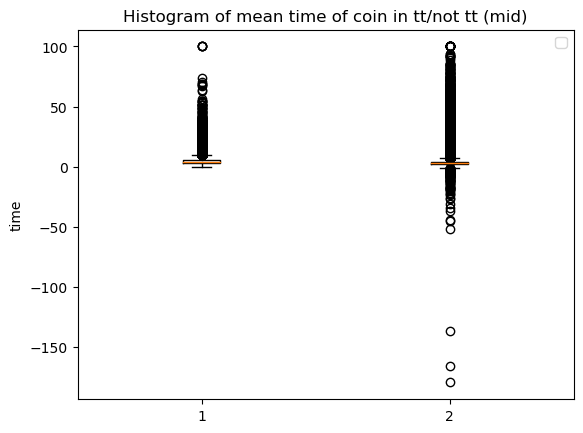

In [28]:
coin_m_w_tt = df[df['is_tt'] == '1']['stats_array_'].apply(lambda x: min(100, round(float(x[34]), 2)))
coin_m_b_tt = df[df['is_tt'] == '1']['stats_array_'].apply(lambda x: min(100, round(float(x[40]), 2)))
coin_m_w_not_tt = df[df['is_tt'] == '0']['stats_array_'].apply(lambda x: min(100, round(float(x[34]), 2)))
coin_m_b_not_tt = df[df['is_tt'] == '0']['stats_array_'].apply(lambda x: min(100, round(float(x[40]), 2)))
y = pd.concat([coin_m_w_tt, coin_m_b_tt])
y2 = pd.concat([coin_m_w_not_tt, coin_m_b_not_tt])
plt.boxplot([y, y2])
plt.title('Histogram of mean time of coin in tt/not tt (mid)')
plt.legend()
plt.ylabel('time')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


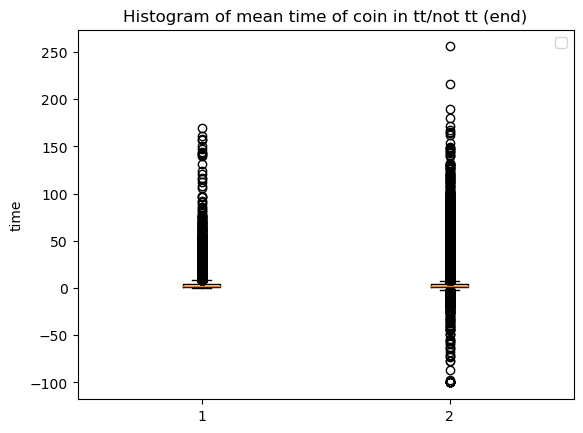

In [29]:
coin_m_w_tt = df[df['is_tt'] == '1']['stats_array_'].apply(lambda x: max(-100, round(float(x[36]), 2)))
coin_m_b_tt = df[df['is_tt'] == '1']['stats_array_'].apply(lambda x:  max(-100, round(float(x[42]), 2)))
coin_m_w_not_tt = df[df['is_tt'] == '0']['stats_array_'].apply(lambda x:  max(-100, round(float(x[36]), 2)))
coin_m_b_not_tt = df[df['is_tt'] == '0']['stats_array_'].apply(lambda x:  max(-100, round(float(x[42]), 2)))
y = pd.concat([coin_m_w_tt, coin_m_b_tt])
y2 = pd.concat([coin_m_w_not_tt, coin_m_b_not_tt])
plt.boxplot([y, y2])
plt.title('Histogram of mean time of coin in tt/not tt (end)')
plt.legend()
plt.ylabel('time')
plt.show()

In [139]:

k = sum(df['stats_array_'].apply(lambda x: int(x[56])))
fort = sum(df['stats_array_'].apply(lambda x: int(x[57])))
fifth = sum(df['stats_array_'].apply(lambda x: int(x[58])))
six = sum(df['stats_array_'].apply(lambda x: int(x[59])))
seven = sum(df['stats_array_'].apply(lambda x: int(x[60])))
eig = sum(df['stats_array_'].apply(lambda x: int(x[61])))
nine = sum(df['stats_array_'].apply(lambda x: int(x[62])))
t = sum(df['stats_array_'].apply(lambda x: int(x[63])))
n = sum(df['stats_array_'].apply(lambda x: int(x[64])))
m = sum(df['stats_array_'].apply(lambda x: int(x[65])))

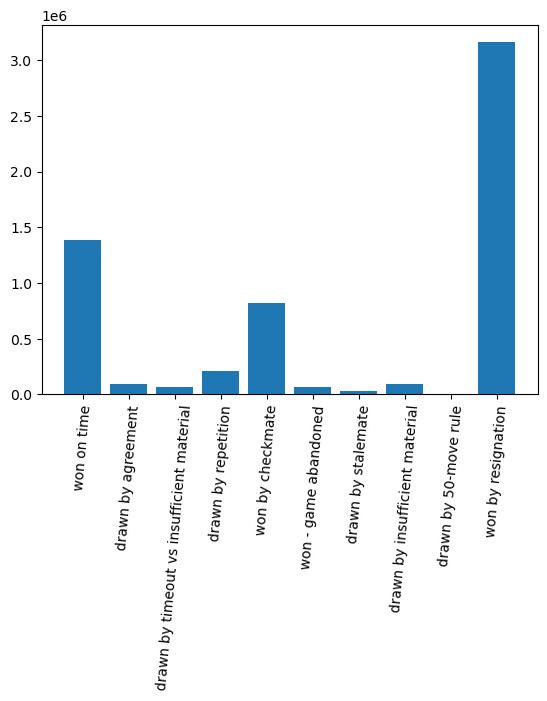

In [140]:
values = [k, fort, fifth, six, seven, eig, nine, t, n, m]
labels = [ 'won on time',
 'drawn by agreement',
 'drawn by timeout vs insufficient material',
 'drawn by repetition',
 'won by checkmate',
 'won - game abandoned',
 'drawn by stalemate',
 'drawn by insufficient material',
 'drawn by 50-move rule',
 'won by resignation']

plt.bar(labels, values)
plt.xticks(rotation=85)
plt.show()

### ГРАФИКИ ПОСЛЕ СОЗВОНА

Зависимость вероятности победы (соотношение побед) от соотношения рейтингов

In [141]:
df['W_rate'] = df['stats_array_'].apply(lambda x: int(x[0]))
df['B_rate'] = df['stats_array_'].apply(lambda x: int(x[1]))
df['W_res'] = df['stats_array_'].apply(lambda x: round(float(x[15]), 2))
df['B_res'] = df['stats_array_'].apply(lambda x: round(float(x[16]), 2))
df['W_res_all'] = df['stats_array_'].apply(lambda x: 1 if round(float(x[15]), 2) > 0 else 0)
df['B_res_all'] = df['stats_array_'].apply(lambda x: 1 if round(float(x[16]), 2) > 0 else 0)

In [142]:
df['Ratio_W_B'] = df['stats_array_'].apply(lambda x: round(float(x[18]), 1))
df['Ratio_B_W'] = df['stats_array_'].apply(lambda x: 1/max(round(float(x[18]), 1), 0.1))

In [143]:
mean_W = df.groupby('Ratio_W_B')['W_res'].mean()
mean_B = df.groupby('Ratio_B_W')['B_res'].mean()

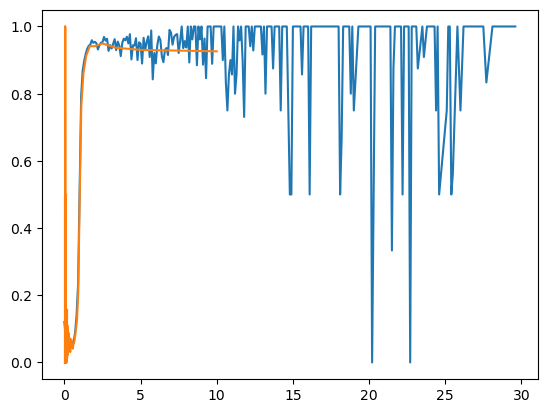

In [144]:
plt.plot(mean_W)
plt.plot(mean_B)
plt.show()

In [145]:
df['diff_W_B'] = df['W_rate'] - df['B_rate']
df['quant_diff_W_B'] = round((df['diff_W_B'])/100)* 100
df['quant_diff_B_W'] = -df['quant_diff_W_B']

In [146]:
mean_W_all = df.groupby('quant_diff_W_B')['W_res_all'].mean()
mean_B_all = df.groupby('quant_diff_B_W')['B_res_all'].mean()

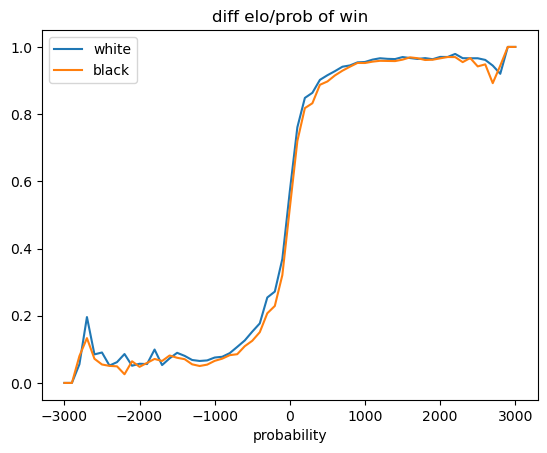

In [147]:
plt.plot(mean_W_all, label='white')
plt.plot(mean_B_all, label='black')
plt.title('diff elo/prob of win')
plt.xlabel('elo diff')
plt.xlabel('probability')
plt.legend()
plt.show()

In [148]:
mean_W = df.groupby('quant_diff_W_B')['W_res'].mean()
mean_B = df.groupby('quant_diff_B_W')['B_res'].mean()

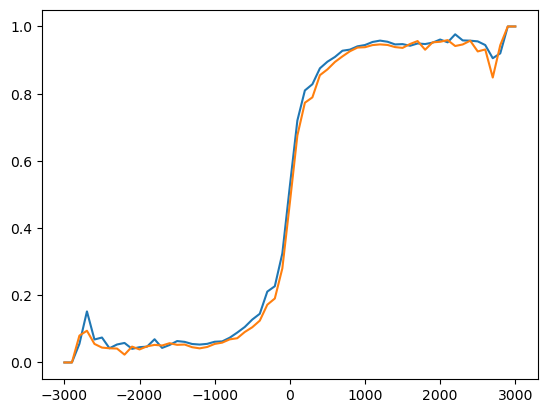

In [149]:
plt.plot(mean_W)
plt.plot(mean_B)
plt.show()

In [218]:
dan_narodits = df[df['White'] == 'DanielNaroditsky']

In [219]:
jospem = df[df['White'] == 'Jospem']

In [220]:
magnus = df[df['White'] == 'MagnusCarlsen']

In [221]:
kramnik = df[df['White'] == 'VladimirKramnik']

In [222]:
sarin = df[df['White'] == 'nihalsarin']

In [223]:
df['tt'] = df['stats_array_'].apply(lambda x: x[17])

In [224]:
def player_stats(df, player):
    
    games_w = df[df['White'] == player]
    games_b = df[df['Black'] == player]
    
    diff_coin_frac_mid = pd.concat([games_w['stats_array_'].apply(lambda x: round(float(x[4]), 2) - round(float(x[21]), 2)),games_b['stats_array_'].apply(lambda x: round(float(x[7]), 2) - round(float(x[27]), 2))])
    diff_coin_frac_end = pd.concat([games_w['stats_array_'].apply(lambda x: round(float(x[5]), 2) - round(float(x[22]), 2)),games_b['stats_array_'].apply(lambda x: round(float(x[8]), 2) - round(float(x[28]), 2))])
    
    
    coin_mid = pd.concat([games_w['stats_array_'].apply(lambda x: round(float(x[4]), 2)),games_b['stats_array_'].apply(lambda x: round(float(x[7]), 2))])
    coin_end = pd.concat([games_w['stats_array_'].apply(lambda x: round(float(x[5]), 2)),games_b['stats_array_'].apply(lambda x: round(float(x[8]), 2))])
    
    games_w_tt = games_w[games_w['tt'] == '1']
    games_b_tt = games_b[games_b['tt'] == '1']
    coin_mid_tt = pd.concat([games_w_tt['stats_array_'].apply(lambda x: round(float(x[4]), 2)), games_b_tt['stats_array_'].apply(lambda x: round(float(x[7]), 2))])
    coin_end_tt = pd.concat([games_w_tt['stats_array_'].apply(lambda x: round(float(x[5]), 2)), games_b_tt['stats_array_'].apply(lambda x: round(float(x[8]), 2))])
    
    diff_coin_frac_mid_tt = pd.concat([games_w_tt['stats_array_'].apply(lambda x: round(float(x[4]), 2) - round(float(x[21]), 2)),games_b_tt['stats_array_'].apply(lambda x: round(float(x[7]), 2) - round(float(x[27]), 2))])
    diff_coin_frac_end_tt = pd.concat([games_w_tt['stats_array_'].apply(lambda x: round(float(x[5]), 2) - round(float(x[22]), 2)),games_b_tt['stats_array_'].apply(lambda x: round(float(x[8]), 2) - round(float(x[28]), 2))])
    
    games_w_not_tt = games_w[games_w['tt'] == '0']
    games_b_not_tt = games_b[games_b['tt'] == '0']
    coin_mid_not_tt = pd.concat([games_w_not_tt['stats_array_'].apply(lambda x: round(float(x[4]), 2)), games_b_not_tt['stats_array_'].apply(lambda x: round(float(x[7]), 2))])
    coin_end_not_tt = pd.concat([games_w_not_tt['stats_array_'].apply(lambda x: round(float(x[5]), 2)), games_b_not_tt['stats_array_'].apply(lambda x: round(float(x[8]), 2))])
    
    diff_coin_frac_mid_not_tt = pd.concat([games_w_not_tt['stats_array_'].apply(lambda x: round(float(x[4]), 2) - round(float(x[21]), 2)),games_b_not_tt['stats_array_'].apply(lambda x: round(float(x[7]), 2) - round(float(x[27]), 2))])
    diff_coin_frac_end_not_tt = pd.concat([games_w_not_tt['stats_array_'].apply(lambda x: round(float(x[5]), 2) - round(float(x[22]), 2)),games_b_not_tt['stats_array_'].apply(lambda x: round(float(x[8]), 2) - round(float(x[28]), 2))])
    
    print(f'{player} stats: difff coin frac in mit: {round(diff_coin_frac_mid.mean(), 3)}, diff coin in end: {round(diff_coin_frac_end.mean(), 3)}, diff coin frac at all: {round((diff_coin_frac_end.mean() + diff_coin_frac_mid.mean())/2, 3)}')
    print(f'{player} stats: coin in mit: {round(coin_mid.mean(), 3)}, coin in end: {round(coin_end.mean(), 3)}, coin at all: {round((coin_end.mean() + coin_mid.mean())/2, 3)}')
    print(f'{player} stats: coin in mit (tt): {round(coin_mid_tt.mean(), 3)}, coin in end (tt): {round(coin_end_tt.mean(), 3)}, coin at all: {round((coin_end_tt.mean() + coin_mid_tt.mean())/2, 3)}')
    print(f'{player} stats: coin in mit (not tt): {round(coin_mid_not_tt.mean(), 3)}, coin in end (not tt): {round(coin_end_not_tt.mean(), 3)}, coin at all: {round((coin_end_not_tt.mean() + coin_mid_not_tt.mean())/2, 3)}')
    plt.boxplot([coin_mid_tt, coin_end_tt, coin_mid_not_tt, coin_end_not_tt], labels=[f'coin in mit (tt) {round(coin_mid_tt.mean(), 3)}', f'coin in end (tt) {round(coin_end_tt.mean(), 3)}', f'coin in mit (not tt) {round(coin_mid_not_tt.mean(), 3)}', f'coin in end (not tt) {round(coin_end_not_tt.mean(), 3)}'], showfliers=False)
    plt.grid(True)
    plt.ylabel('Доля совпадений')
    plt.title(f'Доля свпадений в разных турнирах {player}')
    plt.xticks(rotation=60)
    plt.show()

    return pd.concat([coin_end_tt, coin_mid_tt]), pd.concat([coin_end_not_tt, coin_mid_not_tt]), pd.concat([diff_coin_frac_mid, diff_coin_frac_end]), pd.concat([diff_coin_frac_mid_tt, diff_coin_frac_end_tt]),pd.concat([diff_coin_frac_mid_not_tt, diff_coin_frac_end_not_tt])

DanielNaroditsky stats: difff coin frac in mit: 0.007, diff coin in end: 0.003, diff coin frac at all: 0.005
DanielNaroditsky stats: coin in mit: 0.479, coin in end: 0.506, coin at all: 0.493
DanielNaroditsky stats: coin in mit (tt): 0.493, coin in end (tt): 0.533, coin at all: 0.513
DanielNaroditsky stats: coin in mit (not tt): 0.478, coin in end (not tt): 0.505, coin at all: 0.492


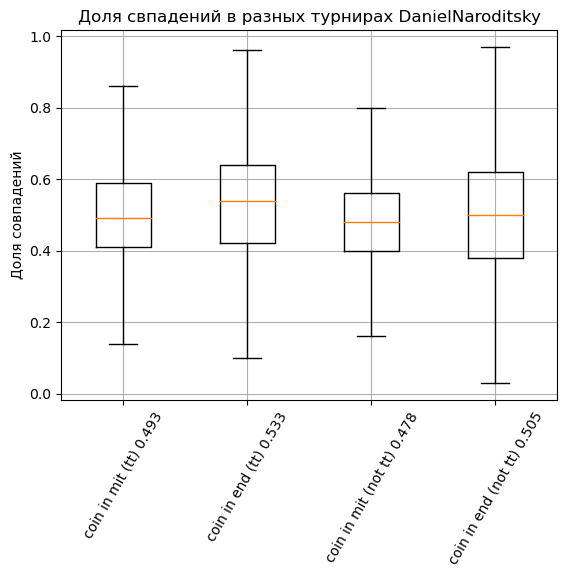

In [225]:
dn_all_tt, dn_all_not_tt, dn_diff_all, dn_diff_tt, dn_diff_not_tt = player_stats(df, 'DanielNaroditsky')

Jospem stats: difff coin frac in mit: 0.005, diff coin in end: 0.009, diff coin frac at all: 0.007
Jospem stats: coin in mit: 0.458, coin in end: 0.487, coin at all: 0.472
Jospem stats: coin in mit (tt): 0.472, coin in end (tt): 0.507, coin at all: 0.49
Jospem stats: coin in mit (not tt): 0.456, coin in end (not tt): 0.484, coin at all: 0.47


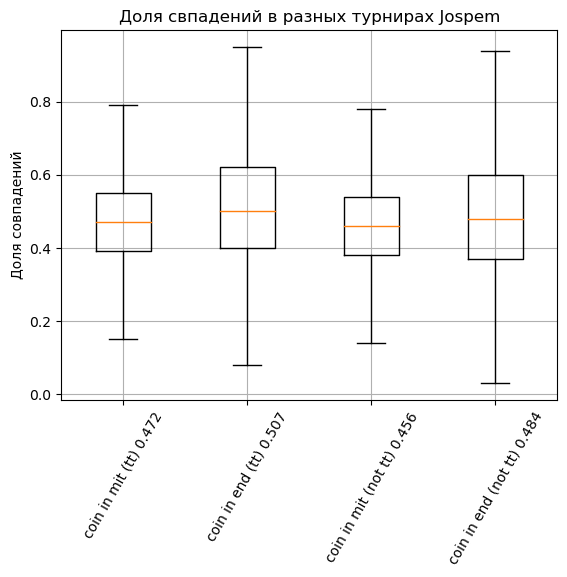

In [226]:
j_all_tt, j_all_not_tt, j_diff_all, j_diff_tt, j_diff_not_tt = player_stats(df, 'Jospem')

MagnusCarlsen stats: difff coin frac in mit: 0.004, diff coin in end: 0.002, diff coin frac at all: 0.003
MagnusCarlsen stats: coin in mit: 0.535, coin in end: 0.569, coin at all: 0.552
MagnusCarlsen stats: coin in mit (tt): 0.539, coin in end (tt): 0.58, coin at all: 0.56
MagnusCarlsen stats: coin in mit (not tt): 0.534, coin in end (not tt): 0.566, coin at all: 0.55


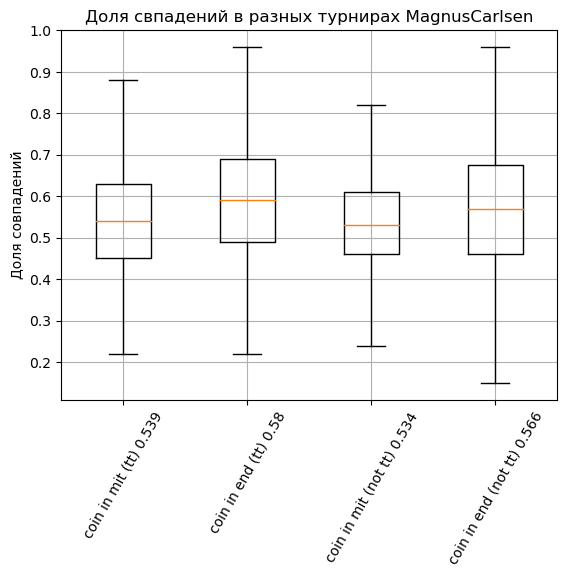

In [227]:
mk_all_tt, mk_all_not_tt, mk_diff_all, mk_diff_tt, mk_diff_not_tt = player_stats(df, 'MagnusCarlsen')

VladimirKramnik stats: difff coin frac in mit: 0.002, diff coin in end: 0.002, diff coin frac at all: 0.002
VladimirKramnik stats: coin in mit: 0.526, coin in end: 0.509, coin at all: 0.518
VladimirKramnik stats: coin in mit (tt): 0.517, coin in end (tt): 0.498, coin at all: 0.508
VladimirKramnik stats: coin in mit (not tt): 0.529, coin in end (not tt): 0.512, coin at all: 0.521


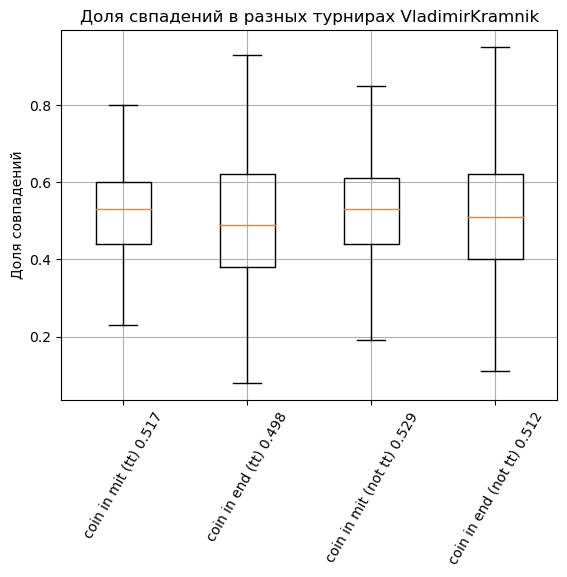

In [228]:
vk_all_tt, vk_all_not_tt, vk_diff_all, vk_diff_tt, vk_diff_not_tt = player_stats(df, 'VladimirKramnik')

nihalsarin stats: difff coin frac in mit: 0.005, diff coin in end: 0.013, diff coin frac at all: 0.009
nihalsarin stats: coin in mit: 0.504, coin in end: 0.527, coin at all: 0.515
nihalsarin stats: coin in mit (tt): 0.497, coin in end (tt): 0.562, coin at all: 0.529
nihalsarin stats: coin in mit (not tt): 0.504, coin in end (not tt): 0.525, coin at all: 0.514


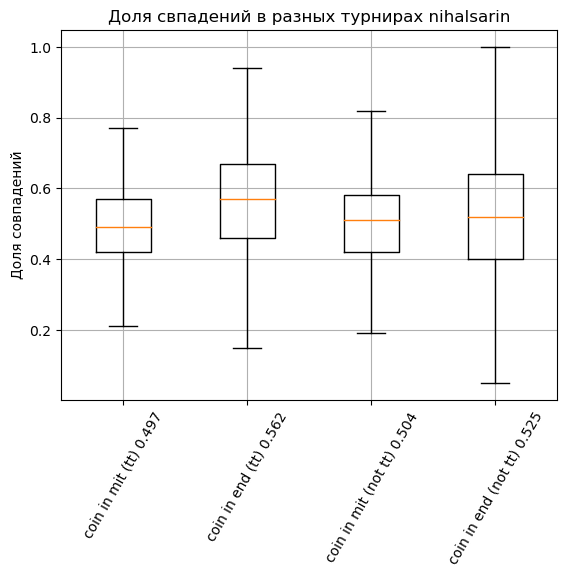

In [229]:
nh_all_tt, nh_all_not_tt, nh_diff_all, nh_diff_tt, nh_diff_not_tt = player_stats(df, 'nihalsarin')

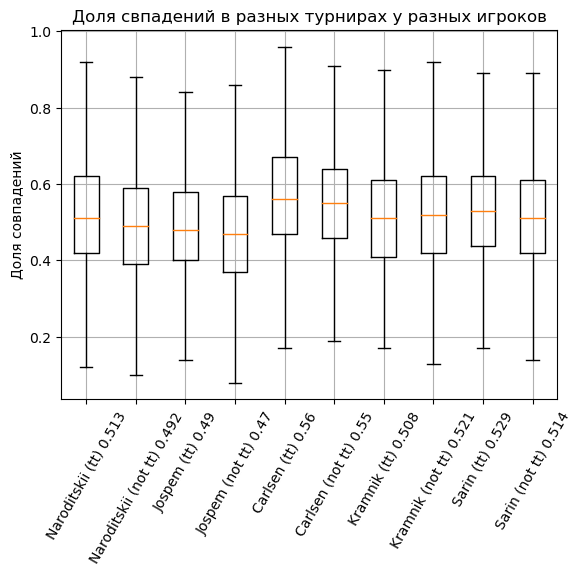

In [230]:
    plt.boxplot([dn_all_tt, dn_all_not_tt, j_all_tt, j_all_not_tt, mk_all_tt, mk_all_not_tt, vk_all_tt, vk_all_not_tt, nh_all_tt, nh_all_not_tt],
                labels=[f'Naroditskii (tt) {round(dn_all_tt.mean(), 3)}', f'Naroditskii (not tt) {round(dn_all_not_tt.mean(), 3)}', f'Jospem (tt) {round(j_all_tt.mean(), 3)}',
                        f'Jospem (not tt) {round(j_all_not_tt.mean(), 3)}', f'Carlsen (tt) {round(mk_all_tt.mean(), 3)}', f'Carlsen (not tt) {round(mk_all_not_tt.mean(), 3)}', 
                        f'Kramnik (tt) {round(vk_all_tt.mean(), 3)}', f'Kramnik (not tt) {round(vk_all_not_tt.mean(), 3)}', f'Sarin (tt) {round(nh_all_tt.mean(), 3)}', f'Sarin (not tt) {round(nh_all_not_tt.mean(), 3)}' ], 
                showfliers=False)
    plt.grid(True)
    plt.ylabel('Доля совпадений')
    plt.title(f'Доля свпадений в разных турнирах у разных игроков')
    plt.xticks(rotation=60)
    plt.show()

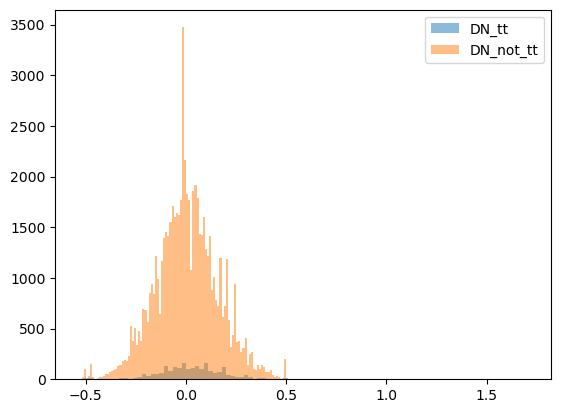

mean diff in TT: 0.025223255813953502, mean diff in not TT: 0.004868710667452037


In [163]:
plt.hist(dn_diff_tt, bins=100, alpha=.5, label='DN_tt')
plt.hist(dn_diff_not_tt, bins=100, alpha=.5, label='DN_not_tt')
plt.legend()
plt.show()
print(f'mean diff in TT: {dn_diff_tt.mean()}, mean diff in not TT: {dn_diff_not_tt.mean()}')

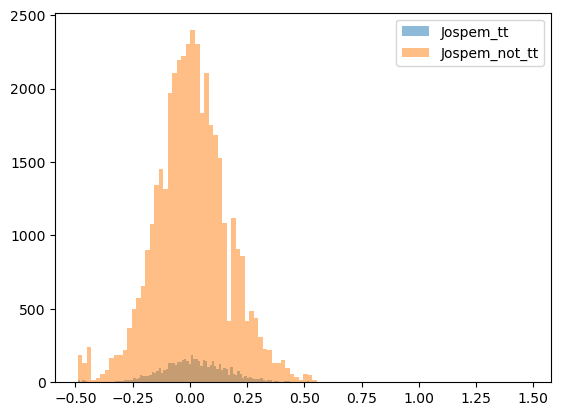

mean diff in TT: 0.01943011166730843, mean diff in not TT: 0.007347175838536372


In [164]:
plt.hist(j_diff_tt, bins=100, alpha=.5, label='Jospem_tt')
plt.hist(j_diff_not_tt, bins=100, alpha=.5, label='Jospem_not_tt')
plt.legend()
plt.show()
print(f'mean diff in TT: {j_diff_tt.mean()}, mean diff in not TT: {j_diff_not_tt.mean()}')

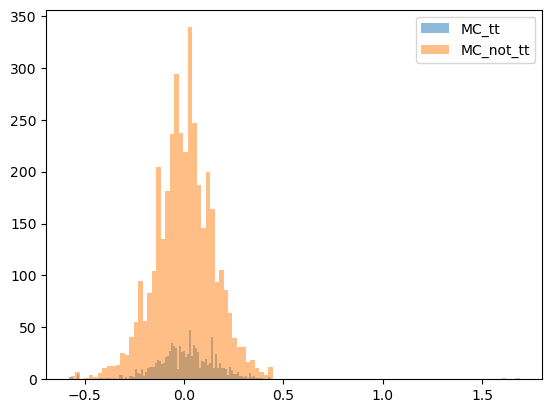

mean diff in TT: 0.010092592592592585, mean diff in not TT: 0.0020036194415718554


In [165]:
plt.hist(mk_diff_tt, bins=100, alpha=.5, label='MC_tt')
plt.hist(mk_diff_not_tt, bins=100, alpha=.5, label='MC_not_tt')
plt.legend()
plt.show()
print(f'mean diff in TT: {mk_diff_tt.mean()}, mean diff in not TT: {mk_diff_not_tt.mean()}')

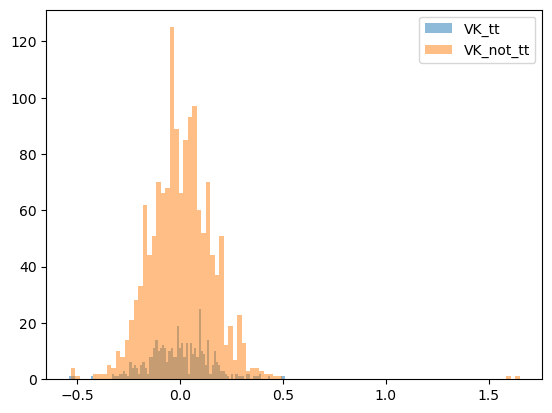

mean diff in TT: -0.002024390243902446, mean diff in not TT: 0.005219178082191768


In [166]:
plt.hist(vk_diff_tt, bins=100, alpha=.5, label='VK_tt')

plt.hist(vk_diff_not_tt, bins=100, alpha=.5, label='VK_not_tt')
plt.legend()
plt.show()
print(f'mean diff in TT: {vk_diff_tt.mean()}, mean diff in not TT: {vk_diff_not_tt.mean()}')

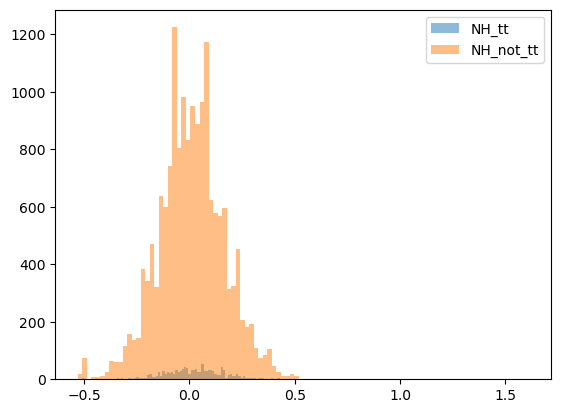

mean diff in TT: 0.018199999999999994, mean diff in not TT: 0.008489066794121158


In [167]:
plt.hist(nh_diff_tt, bins=100, alpha=.5, label='NH_tt')
plt.hist(nh_diff_not_tt, bins=100, alpha=.5, label='NH_not_tt')
plt.legend()
plt.show()
print(f'mean diff in TT: {nh_diff_tt.mean()}, mean diff in not TT: {nh_diff_not_tt.mean()}')

In [43]:
df = pd.read_parquet('withtourlong_new')

In [44]:
df.head()

,Date,White,Black,Tournament,WhiteElo,BlackELo,StartTime,Tournament_long,coin_w_frac_d,coin_w_frac_m,coin_w_frac_e,coin_b_frac_d,coin_b_frac_m,coin_b_frac_e
0,2021.03.23,zala02,ChessAurochs,titled-tuesday,2194,2554,17:00:06,-titled-tuesday-blitz-2132081,0.8,0.000000,0.444444,0.4,0.444444,0.444444
1,2021.03.23,GMSrinath,Cryptinz,titled-tuesday,2808,2534,17:10:19,-titled-tuesday-blitz-2132081,0.4,0.434783,0.480000,0.6,0.347826,0.560000
2,2021.03.23,Firouzja2003,Lovkov_Roman,titled-tuesday,3129,2730,17:21:52,-titled-tuesday-blitz-2132081,0.2,0.666667,0.555556,0.6,0.285714,0.222222
3,2021.03.23,BJthechessgod,RamyresCoelho,titled-tuesday,2312,2106,17:21:44,-titled-tuesday-blitz-2132081,1.0,0.410959,0.560000,0.6,0.575342,0.400000
4,2021.03.23,m_ezat,Kobalia,titled-tuesday,2505,2736,17:48:05,-titled-tuesday-blitz-2132081,0.4,0.372093,0.344828,0.4,0.558140,0.482759


In [45]:
vk_games_w = df[df['White'] == 'VladimirKramnik']
vk_games_b = df[df['Black'] == 'VladimirKramnik']
vk_games = pd.concat([vk_games_w, vk_games_b])
vk_games = vk_games[vk_games['Tournament_long'] == 'late-titled-tuesday-blitz-march-07-2023-3881869']
vk_games = vk_games.sort_values(by=['Date', 'StartTime'], ascending=[True, True])

# late-titled-tuesday-blitz-march-07-2023-3881869, Vladimir Kramnik

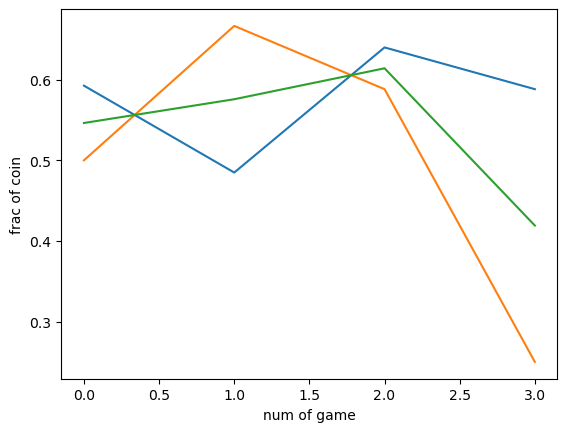

In [53]:
vk_games_w = df[df['White'] == 'VladimirKramnik']
vk_games_b = df[df['Black'] == 'VladimirKramnik']
vk_games = pd.concat([vk_games_w, vk_games_b])
vk_games = vk_games[vk_games['Tournament_long'] == 'late-titled-tuesday-blitz-march-28-2023-3934068']
vk_games = vk_games.sort_values(by=['Date', 'StartTime'], ascending=[True, True])
vk_games
mid_scores = []
end_scores = []
all_scores = []
for _, row in vk_games.iterrows():
    if row['White'] == 'VladimirKramnik':
        mid_scores.append(row['coin_w_frac_m'])
        end_scores.append(row['coin_w_frac_e'])
        all_scores.append((row['coin_w_frac_m'] + row['coin_w_frac_e'])/2)
    else:
        mid_scores.append(row['coin_b_frac_m'])
        end_scores.append(row['coin_b_frac_e'])
        all_scores.append((row['coin_b_frac_m'] + row['coin_b_frac_e'])/2)
plt.xlabel('num of game')
plt.ylabel('frac of coin')
plt.plot(mid_scores)
plt.plot(end_scores)
plt.plot(all_scores)
plt.show()

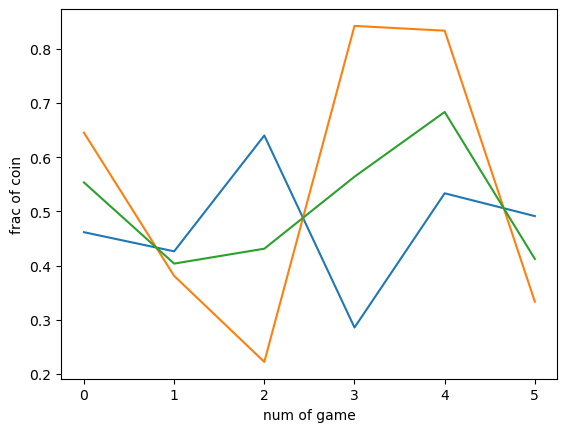

In [54]:
vk_games_w = df[df['White'] == 'VladimirKramnik']
vk_games_b = df[df['Black'] == 'VladimirKramnik']
vk_games = pd.concat([vk_games_w, vk_games_b])
vk_games = vk_games[vk_games['Tournament_long'] == 'late-titled-tuesday-blitz-april-11-2023-3961659']
vk_games = vk_games.sort_values(by=['Date', 'StartTime'], ascending=[True, True])
vk_games
mid_scores = []
end_scores = []
all_scores = []
for _, row in vk_games.iterrows():
    if row['White'] == 'VladimirKramnik':
        mid_scores.append(row['coin_w_frac_m'])
        end_scores.append(row['coin_w_frac_e'])
        all_scores.append((row['coin_w_frac_m'] + row['coin_w_frac_e'])/2)
    else:
        mid_scores.append(row['coin_b_frac_m'])
        end_scores.append(row['coin_b_frac_e'])
        all_scores.append((row['coin_b_frac_m'] + row['coin_b_frac_e'])/2)
plt.xlabel('num of game')
plt.ylabel('frac of coin')
plt.plot(mid_scores)
plt.plot(end_scores)
plt.plot(all_scores)

plt.show()

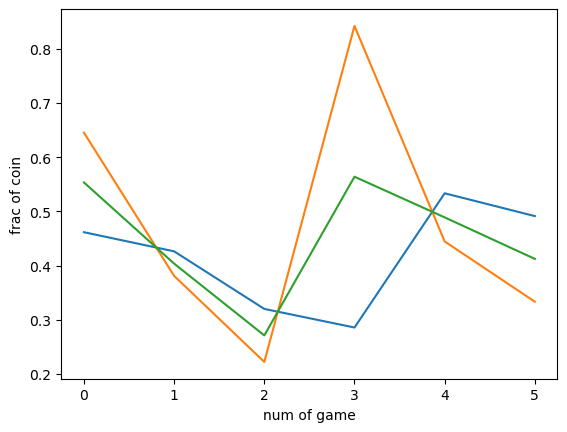

In [55]:
mc_games_w = df[df['White'] == 'MagnusCarlsen']
mc_games_b = df[df['Black'] == 'MagnusCarlsen']
mc_games = pd.concat([mc_games_w, mc_games_b])
mc_games = mc_games[mc_games['Tournament_long'] == 'early-titled-tuesday-blitz-march-21-2023-3920018']
mc_games = mc_games.sort_values(by=['Date', 'StartTime'], ascending=[True, True])

mid_scores = []
end_scores = []
all_scores = []
for _, row in vk_games.iterrows():
    if row['White'] == 'MagnusCarlsen':
        mid_scores.append(row['coin_w_frac_m'])
        end_scores.append(row['coin_w_frac_e'])
        all_scores.append((row['coin_w_frac_m'] + row['coin_w_frac_e'])/2)
    else:
        mid_scores.append(row['coin_b_frac_m'])
        end_scores.append(row['coin_b_frac_e'])
        all_scores.append((row['coin_b_frac_m'] + row['coin_b_frac_e'])/2)
plt.xlabel('num of game')
plt.ylabel('frac of coin')
plt.plot(mid_scores)
plt.plot(end_scores)
plt.plot(all_scores)
plt.show()

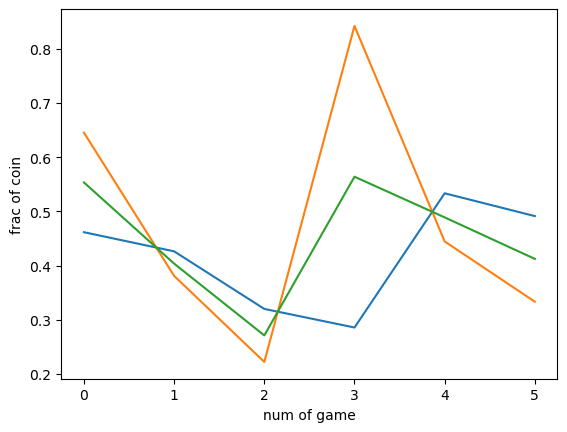

In [57]:
import matplotlib.pyplot as plt

mc_games_w = df[df['White'] == 'MagnusCarlsen']
mc_games_b = df[df['Black'] == 'MagnusCarlsen']
mc_games = pd.concat([mc_games_w, mc_games_b])
mc_games = mc_games[mc_games['Tournament_long'] == 'late-titled-tuesday-blitz-may-09-2023-4016603']
mc_games = mc_games.sort_values(by=['Date', 'StartTime'], ascending=[True, True])
mid_scores = []
end_scores = []
all_scores = []
for _, row in vk_games.iterrows():
    if row['White'] == 'MagnusCarlsen':
        mid_scores.append(row['coin_w_frac_m'])
        end_scores.append(row['coin_w_frac_e'])
        all_scores.append((row['coin_w_frac_m'] + row['coin_w_frac_e'])/2)
    else:
        mid_scores.append(row['coin_b_frac_m'])
        end_scores.append(row['coin_b_frac_e'])
        all_scores.append((row['coin_b_frac_m'] + row['coin_b_frac_e'])/2)
plt.xlabel('num of game')
plt.ylabel('frac of coin')
plt.plot(mid_scores)
plt.plot(end_scores)
plt.plot(all_scores)
plt.show()

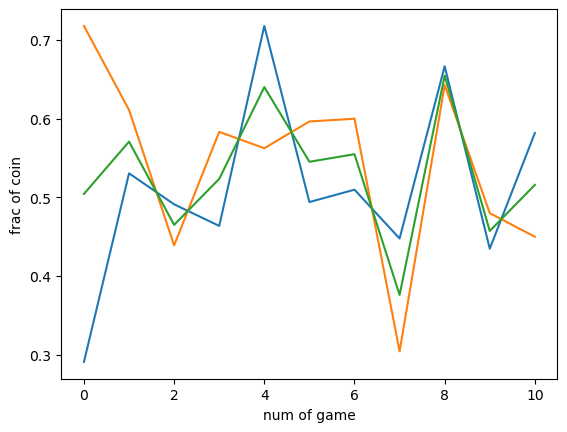

In [58]:
import matplotlib.pyplot as plt

j_games_w = df[df['White'] == 'Jospem']
j_games_b = df[df['Black'] == 'Jospem']
j_games = pd.concat([j_games_w, j_games_b])
j_games = j_games[j_games['Tournament_long'] == 'titled-tuesday-blitz-february-01-2022-a-2930234']
j_games = j_games.sort_values(by=['Date', 'StartTime'], ascending=[True, True])
j_games
mid_scores = []
end_scores = []
all_scores = []
for _, row in j_games.iterrows():
    if row['White'] == 'Jospem':
        mid_scores.append(row['coin_w_frac_m'])
        end_scores.append(row['coin_w_frac_e'])
        all_scores.append((row['coin_w_frac_m'] + row['coin_w_frac_e'])/2)
    else:
        mid_scores.append(row['coin_b_frac_m'])
        end_scores.append(row['coin_b_frac_e'])
        all_scores.append((row['coin_b_frac_m'] + row['coin_b_frac_e'])/2)
plt.xlabel('num of game')
plt.ylabel('frac of coin')
plt.plot(mid_scores)
plt.plot(end_scores)
plt.plot(all_scores)
plt.show()

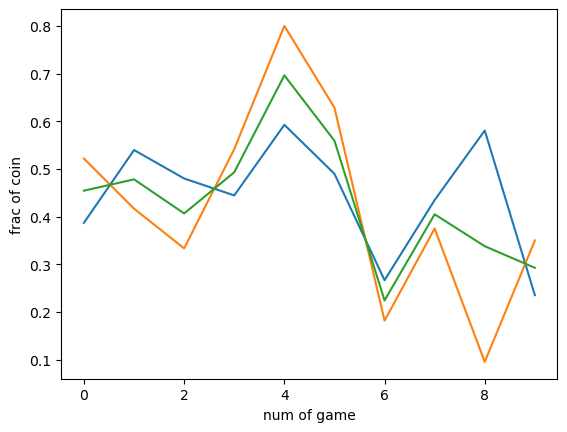

In [59]:
import matplotlib.pyplot as plt

j_games_w = df[df['White'] == 'Jospem']
j_games_b = df[df['Black'] == 'Jospem']
j_games = pd.concat([j_games_w, j_games_b])
j_games = j_games[j_games['Tournament_long'] == '-scc-grand-prix-titled-tuesday-blitz-1613697']
j_games = j_games.sort_values(by=['Date', 'StartTime'], ascending=[True, True])
j_games
mid_scores = []
end_scores = []
all_scores = []
for _, row in j_games.iterrows():
    if row['White'] == 'Jospem':
        mid_scores.append(row['coin_w_frac_m'])
        end_scores.append(row['coin_w_frac_e'])
        all_scores.append((row['coin_w_frac_m'] + row['coin_w_frac_e'])/2)
    else:
        mid_scores.append(row['coin_b_frac_m'])
        end_scores.append(row['coin_b_frac_e'])
        all_scores.append((row['coin_b_frac_m'] + row['coin_b_frac_e'])/2)
plt.xlabel('num of game')
plt.ylabel('frac of coin')
plt.plot(mid_scores)
plt.plot(end_scores)
plt.plot(all_scores)
plt.show()

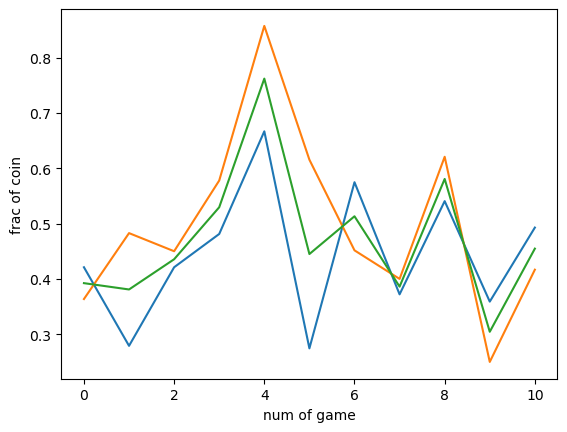

In [60]:
import matplotlib.pyplot as plt

j_games_w = df[df['White'] == 'Jospem']
j_games_b = df[df['Black'] == 'Jospem']
j_games = pd.concat([j_games_w, j_games_b])
j_games = j_games[j_games['Tournament_long'] == 'early-titled-tuesday-blitz-march-08-2022-2997971']
j_games = j_games.sort_values(by=['Date', 'StartTime'], ascending=[True, True])
j_games
mid_scores = []
end_scores = []
all_scores = []
for _, row in j_games.iterrows():
    if row['White'] == 'Jospem':
        mid_scores.append(row['coin_w_frac_m'])
        end_scores.append(row['coin_w_frac_e'])
        all_scores.append((row['coin_w_frac_m'] + row['coin_w_frac_e'])/2)
    else:
        mid_scores.append(row['coin_b_frac_m'])
        end_scores.append(row['coin_b_frac_e'])
        all_scores.append((row['coin_b_frac_m'] + row['coin_b_frac_e'])/2)
plt.xlabel('num of game')
plt.ylabel('frac of coin')
plt.plot(mid_scores)
plt.plot(end_scores)
plt.plot(all_scores)
plt.show()

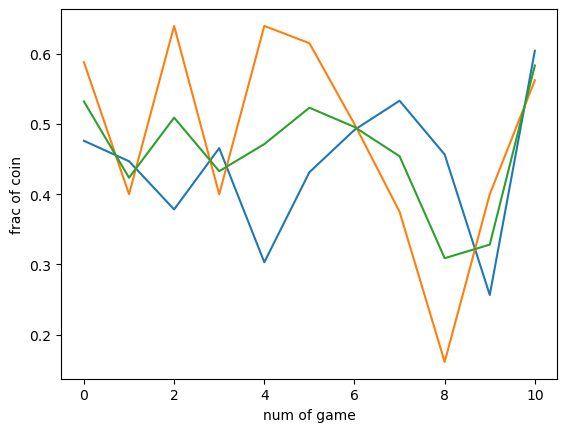

In [61]:
import matplotlib.pyplot as plt

j_games_w = df[df['White'] == 'Jospem']
j_games_b = df[df['Black'] == 'Jospem']
j_games = pd.concat([j_games_w, j_games_b])
j_games = j_games[j_games['Tournament_long'] == 'titled-tuesday-blitz-june-22-2021-2413621']
j_games = j_games.sort_values(by=['Date', 'StartTime'], ascending=[True, True])
j_games
mid_scores = []
end_scores = []
all_scores = []
for _, row in j_games.iterrows():
    if row['White'] == 'Jospem':
        mid_scores.append(row['coin_w_frac_m'])
        end_scores.append(row['coin_w_frac_e'])
        all_scores.append((row['coin_w_frac_m'] + row['coin_w_frac_e'])/2)
    else:
        mid_scores.append(row['coin_b_frac_m'])
        end_scores.append(row['coin_b_frac_e'])
        all_scores.append((row['coin_b_frac_m'] + row['coin_b_frac_e'])/2)
plt.xlabel('num of game')
plt.ylabel('frac of coin')
plt.plot(mid_scores)
plt.plot(end_scores)
plt.plot(all_scores)
plt.show()

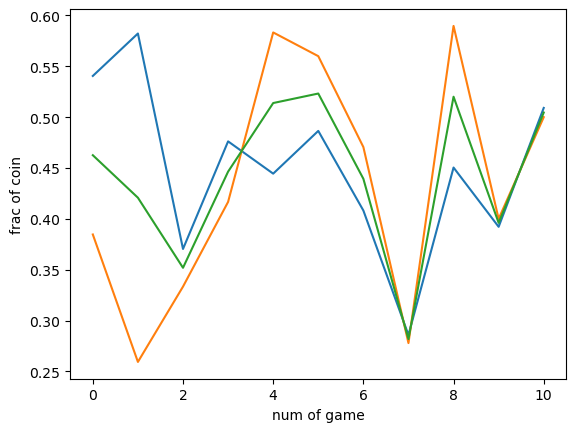

In [62]:
import matplotlib.pyplot as plt

dn_games_w = df[df['White'] == 'DanielNaroditsky']
dn_games_b = df[df['Black'] == 'DanielNaroditsky']
dn_games = pd.concat([dn_games_w, dn_games_b])
dn_games = dn_games[dn_games['Tournament_long'] == 'late-titled-tuesday-blitz-may-09-2023-4016603']
dn_games = dn_games.sort_values(by=['Date', 'StartTime'], ascending=[True, True])
dn_games
mid_scores = []
end_scores = []
all_scores = []
for _, row in dn_games.iterrows():
    if row['White'] == 'Jospem':
        mid_scores.append(row['coin_w_frac_m'])
        end_scores.append(row['coin_w_frac_e'])
        all_scores.append((row['coin_w_frac_m'] + row['coin_w_frac_e'])/2)
    else:
        mid_scores.append(row['coin_b_frac_m'])
        end_scores.append(row['coin_b_frac_e'])
        all_scores.append((row['coin_b_frac_m'] + row['coin_b_frac_e'])/2)
plt.xlabel('num of game')
plt.ylabel('frac of coin')
plt.plot(mid_scores)
plt.plot(end_scores)
plt.plot(all_scores)
plt.show()

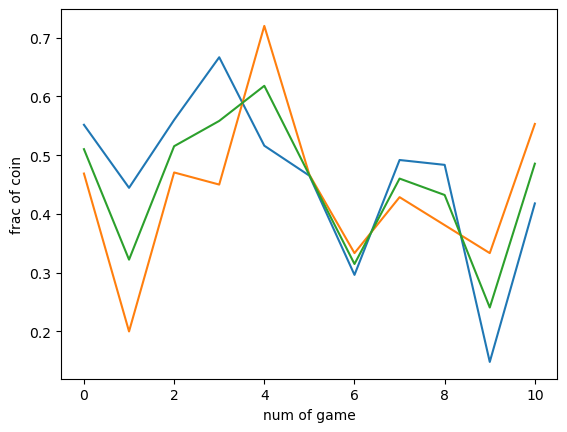

In [63]:
import matplotlib.pyplot as plt

dn_games_w = df[df['White'] == 'DanielNaroditsky']
dn_games_b = df[df['Black'] == 'DanielNaroditsky']
dn_games = pd.concat([dn_games_w, dn_games_b])
dn_games = dn_games[dn_games['Tournament_long'] == 'late-titled-tuesday-blitz-may-02-2023-4002920']
dn_games = dn_games.sort_values(by=['Date', 'StartTime'], ascending=[True, True])
dn_games
mid_scores = []
end_scores = []
all_scores = []
for _, row in dn_games.iterrows():
    if row['White'] == 'Jospem':
        mid_scores.append(row['coin_w_frac_m'])
        end_scores.append(row['coin_w_frac_e'])
        all_scores.append((row['coin_w_frac_m'] + row['coin_w_frac_e'])/2)
    else:
        mid_scores.append(row['coin_b_frac_m'])
        end_scores.append(row['coin_b_frac_e'])
        all_scores.append((row['coin_b_frac_m'] + row['coin_b_frac_e'])/2)
plt.xlabel('num of game')
plt.ylabel('frac of coin')
plt.plot(mid_scores)
plt.plot(end_scores)
plt.plot(all_scores)
plt.show()

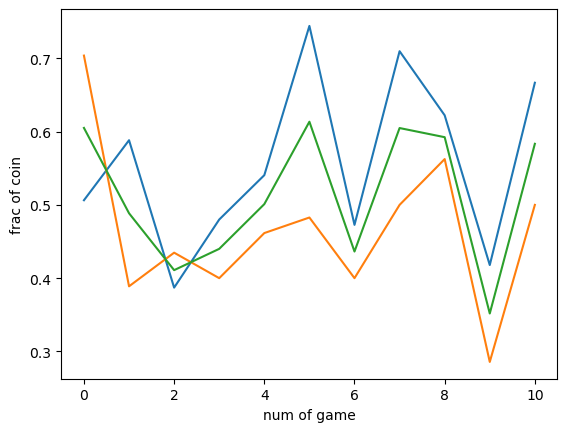

In [64]:
import matplotlib.pyplot as plt

dn_games_w = df[df['White'] == 'DanielNaroditsky']
dn_games_b = df[df['Black'] == 'DanielNaroditsky']
dn_games = pd.concat([dn_games_w, dn_games_b])
dn_games = dn_games[dn_games['Tournament_long'] == 'early-titled-tuesday-blitz-may-30-2023-4047637']
dn_games = dn_games.sort_values(by=['Date', 'StartTime'], ascending=[True, True])
dn_games
mid_scores = []
end_scores = []
all_scores = []
for _, row in dn_games.iterrows():
    if row['White'] == 'DanielNaroditsky':
        mid_scores.append(row['coin_w_frac_m'])
        end_scores.append(row['coin_w_frac_e'])
        all_scores.append((row['coin_w_frac_m'] + row['coin_w_frac_e'])/2)
    else:
        mid_scores.append(row['coin_b_frac_m'])
        end_scores.append(row['coin_b_frac_e'])
        all_scores.append((row['coin_b_frac_m'] + row['coin_b_frac_e'])/2)
plt.xlabel('num of game')
plt.ylabel('frac of coin')
plt.plot(mid_scores)
plt.plot(end_scores)
plt.plot(all_scores)
plt.show()

In [311]:
df = pd.read_parquet('withtourandresult_')

In [312]:
df

,Date,White,Black,Tournament,WhiteElo,BlackELo,StartTime,Tournament_long,coin_w_frac_d,coin_w_frac_m,coin_w_frac_e,coin_b_frac_d,coin_b_frac_m,coin_b_frac_e,Result_w,Result_b
0,2021.03.23,zala02,ChessAurochs,titled-tuesday,2194,2554,17:00:06,-titled-tuesday-blitz-2132081,0.8,0.000000,0.444444,0.4,0.444444,0.444444,0.0,1.0
1,2021.03.23,GMSrinath,Cryptinz,titled-tuesday,2808,2534,17:10:19,-titled-tuesday-blitz-2132081,0.4,0.434783,0.480000,0.6,0.347826,0.560000,1.0,0.0
2,2021.03.23,Firouzja2003,Lovkov_Roman,titled-tuesday,3129,2730,17:21:52,-titled-tuesday-blitz-2132081,0.2,0.666667,0.555556,0.6,0.285714,0.222222,1.0,0.0
3,2021.03.23,BJthechessgod,RamyresCoelho,titled-tuesday,2312,2106,17:21:44,-titled-tuesday-blitz-2132081,1.0,0.410959,0.560000,0.6,0.575342,0.400000,0.5,0.5
4,2021.03.23,m_ezat,Kobalia,titled-tuesday,2505,2736,17:48:05,-titled-tuesday-blitz-2132081,0.4,0.372093,0.344828,0.4,0.558140,0.482759,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428683,2023.12.26,BogdanDeac,Korchmar_Vasiliy,titled-tuesday,3013,2792,16:59:22,early-titled-tuesday-blitz-december-26-2023-44...,0.4,0.709677,0.818182,0.4,0.645161,0.272727,1.0,0.0
428684,2023.12.26,matagordo,noblerone,titled-tuesday,2277,2511,17:38:11,early-titled-tuesday-blitz-december-26-2023-44...,0.6,0.518519,0.545455,0.4,0.296296,0.090909,1.0,0.0
428685,2023.12.26,Gyulamiryan-koryun,tylityli,titled-tuesday,2031,2231,17:48:46,early-titled-tuesday-blitz-december-26-2023-44...,0.6,0.577778,0.388889,0.8,0.444444,0.722222,1.0,0.0
428686,2023.12.26,GMKrikor,CuteSheepCloud,titled-tuesday,2813,2645,22:59:23,late-titled-tuesday-blitz-december-26-2023-447...,0.6,0.483516,0.483871,0.8,0.505495,0.290323,1.0,0.0


In [313]:
import matplotlib.pyplot as plt

dn_games_w = df[df['White'] == 'DanielNaroditsky']
dn_games_b = df[df['Black'] == 'DanielNaroditsky']
dn_games = pd.concat([dn_games_w, dn_games_b])
dn_games = dn_games[dn_games['Tournament_long'] == 'early-titled-tuesday-blitz-may-30-2023-4047637']
dn_games = dn_games.sort_values(by=['Date', 'StartTime'], ascending=[True, True])
elo_soper = 0
w = 0
l = 0
for _, row in dn_games.iterrows():
    if row['White'] == 'DanielNaroditsky':
        elo_soper += int(row['BlackELo'])
        w = row['Result_w']
        l = row['Result_b']
    else:
        elo_soper += int(row['WhiteElo'])
        w = row['Result_b']
        l = row['Result_w']
    
elo_soper /= len(dn_games)
perf = elo_soper + 800*(w - l)/3
perf

2869.3636363636365

In [314]:
import matplotlib.pyplot as plt

j_games_w = df[df['White'] == 'Jospem']
j_games_b = df[df['Black'] == 'Jospem']
j_games = pd.concat([dn_games_w, dn_games_b])
j_games = dn_games[dn_games['Tournament_long'] == 'early-titled-tuesday-blitz-may-30-2023-4047637']
j_games = dn_games.sort_values(by=['Date', 'StartTime'], ascending=[True, True])
elo_soper = 0
w = 0
l = 0
for _, row in dn_games.iterrows():
    if row['White'] == 'DanielNaroditsky':
        elo_soper += int(row['BlackELo'])
        w = row['Result_w']
        l = row['Result_b']
    else:
        elo_soper += int(row['WhiteElo'])
        w = row['Result_b']
        l = row['Result_w']
    
elo_soper /= len(dn_games)
perf = elo_soper + 800*(w - l)/3
perf

2869.3636363636365

### Для UMAP загрузка данных

In [4]:
df = pd.read_parquet('bigdatastats_v2')

In [5]:
df.head()

,White,Black,stats_array_
0,MNikolov,0018Anata,"[2557, 2342, 53, 0.6, 0.8, 0.6, 0.6, 0.72, 0.6..."
1,Tigranpatagonian,007joaquincel,"[2175, 2098, 75, 0.8, 0.61538464, 0.42857143, ..."
2,Turkchess1905,0817chess,"[2832, 2785, 56, 1.0, 0.8148148, 0.47619048, 0..."
3,Y0ung_Capablanca,0817chess,"[2841, 2734, 143, 0.2, 0.5063291, 0.64285713, ..."
4,LikeWater,0817chess,"[2751, 2737, 48, 0.6, 0.47619048, 0.42105263, ..."


In [6]:
df_w = df

In [7]:
df_w['stats_w'] = df['stats_array_'].apply(lambda x: [float(x[0]), float(x[2]), float(x[3]), float(x[4]), float(x[5]), float(x[9]), float(x[10]), 
                                                     float(x[11]), float(x[15]), float(x[17]), float(x[18]), float(x[19]), float(x[20]),
                                                     float(x[21]), float(x[22]), float(x[23]), float(x[24]), float(x[25]), float(x[32]), 
                                                     float(x[33]), float(x[34]), float(x[35]), float(x[36]), float(x[37]), float(x[50]), float(x[51]), float(x[52]), float(x[53]), float(x[54]),
                                                     float(x[55]), float(x[56]), float(x[57]), float(x[58]), float(x[59]), float(x[60]), float(x[61]), float(x[62]),
                                                     float(x[63]), float(x[64]), float(x[65]), 1])

In [8]:
df_w = df_w.drop(['Black', 'stats_array_'], axis=1)
df_w_stats = pd.DataFrame(df_w['stats_w'].tolist(), index=range(len(df_w)))
df_w_stats['White'] = df_w['White']
df_w = df_w_stats

In [9]:
df_b = df

df_b['stats_b'] = df['stats_array_'].apply(lambda x: [float(x[1]),  float(x[2]),  float(x[6]),  float(x[7]),  float(x[8]),  float(x[12]), float(x[13]), 
                                                      float(x[14]), float(x[16]), float(x[17]), float(x[18]), float(x[19]), float(x[26]), float(x[27]), float(x[28]),
                                                      float(x[29]), float(x[30]), float(x[31]), float(x[38]), float(x[39]), float(x[40]), 
                                                      float(x[41]), float(x[42]), float(x[43]), float(x[44]), float(x[45]), float(x[46]), float(x[47]), float(x[48]), float(x[49]),
                                                      float(x[56]), float(x[57]), float(x[58]), float(x[59]), float(x[60]), float(x[61]), float(x[62]),
                                                      float(x[63]), float(x[64]), float(x[65]), 0])

df_b = df_b.drop(['White', 'stats_array_'], axis=1)
df_b_stats = pd.DataFrame(df_b['stats_b'].tolist(), index=range(len(df_b)))
df_b_stats['Black'] = df_b['Black']
df_b = df_b_stats

In [10]:
df_b = df_b.rename(columns={'Black': 'Player'})
df_w = df_w.rename(columns={'White': 'Player'})

In [11]:
df = pd.concat([df_w, df_b])
df = df.dropna()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(bin_centers, mean_coinc, marker='o', label='mean time')
plt.fill_between(bin_centers, lower_bounds, upper_bounds, color='b', alpha = 0.2, label = 'confidence interval (95%)')
plt.title('mean time on bins')
plt.xlabel('elo')
plt.ylabel('mean time')
plt.legend()
plt.grid()
plt.show()